In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
org_data = pd.read_excel('default of credit card clients.xls')
org_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
df = org_data.copy()
df.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


In [4]:
df.columns = df.iloc[0,:]
df = df.drop(0,axis=0)
df.reset_index(drop=True).head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df['ID'].nunique()
# ID is differrent for each record
# so there are 30000 ID's (customers info) in the dataset 

30000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [7]:
df = df.drop('ID',axis=1).reset_index(drop=True)
df.head(3)
# dropping 'ID' column which has no significance in predicting the defaulters

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [8]:
df.columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1_SEP', 'PAY_2_AUG',
       'PAY_3_JUL', 'PAY_4_JUN', 'PAY_5_MAY', 'PAY_6_APR', 'BILL_AMT1_SEP', 'BILL_AMT2_AUG',
       'BILL_AMT3_JUL', 'BILL_AMT4_JUN', 'BILL_AMT5_MAY', 'BILL_AMT6_APR', 'PAY_AMT1_SEP',
       'PAY_AMT2_AUG', 'PAY_AMT3_JUL', 'PAY_AMT4_JUN', 'PAY_AMT5_MAY', 'PAY_AMT6_APR',
       'is_default']
df.columns
# changing the column names for the convenience

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1_SEP',
       'PAY_2_AUG', 'PAY_3_JUL', 'PAY_4_JUN', 'PAY_5_MAY', 'PAY_6_APR',
       'BILL_AMT1_SEP', 'BILL_AMT2_AUG', 'BILL_AMT3_JUL', 'BILL_AMT4_JUN',
       'BILL_AMT5_MAY', 'BILL_AMT6_APR', 'PAY_AMT1_SEP', 'PAY_AMT2_AUG',
       'PAY_AMT3_JUL', 'PAY_AMT4_JUN', 'PAY_AMT5_MAY', 'PAY_AMT6_APR',
       'is_default'],
      dtype='object')

In [9]:
df.shape
# there are 30000 records and 24 variables

(30000, 24)

In [10]:
df.info()
# all the variables given are in object type
# need to convert the datatypes of some of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LIMIT_BAL      30000 non-null  object
 1   SEX            30000 non-null  object
 2   EDUCATION      30000 non-null  object
 3   MARRIAGE       30000 non-null  object
 4   AGE            30000 non-null  object
 5   PAY_1_SEP      30000 non-null  object
 6   PAY_2_AUG      30000 non-null  object
 7   PAY_3_JUL      30000 non-null  object
 8   PAY_4_JUN      30000 non-null  object
 9   PAY_5_MAY      30000 non-null  object
 10  PAY_6_APR      30000 non-null  object
 11  BILL_AMT1_SEP  30000 non-null  object
 12  BILL_AMT2_AUG  30000 non-null  object
 13  BILL_AMT3_JUL  30000 non-null  object
 14  BILL_AMT4_JUN  30000 non-null  object
 15  BILL_AMT5_MAY  30000 non-null  object
 16  BILL_AMT6_APR  30000 non-null  object
 17  PAY_AMT1_SEP   30000 non-null  object
 18  PAY_AMT2_AUG   30000 non-n

In [11]:
df.isnull().sum()
# no missing values in the dataset

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_1_SEP        0
PAY_2_AUG        0
PAY_3_JUL        0
PAY_4_JUN        0
PAY_5_MAY        0
PAY_6_APR        0
BILL_AMT1_SEP    0
BILL_AMT2_AUG    0
BILL_AMT3_JUL    0
BILL_AMT4_JUN    0
BILL_AMT5_MAY    0
BILL_AMT6_APR    0
PAY_AMT1_SEP     0
PAY_AMT2_AUG     0
PAY_AMT3_JUL     0
PAY_AMT4_JUN     0
PAY_AMT5_MAY     0
PAY_AMT6_APR     0
is_default       0
dtype: int64

In [12]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,is_default
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [13]:
df[['SEX','EDUCATION','MARRIAGE','AGE','PAY_1_SEP','PAY_2_AUG','PAY_3_JUL','PAY_4_JUN','PAY_5_MAY','PAY_6_APR','is_default']]=df[['SEX','EDUCATION','MARRIAGE','AGE','PAY_1_SEP','PAY_2_AUG','PAY_3_JUL','PAY_4_JUN','PAY_5_MAY','PAY_6_APR','is_default']].astype('int64')

In [14]:
df[['LIMIT_BAL','BILL_AMT1_SEP','BILL_AMT2_AUG','BILL_AMT3_JUL','BILL_AMT4_JUN','BILL_AMT5_MAY','BILL_AMT6_APR','PAY_AMT1_SEP','PAY_AMT2_AUG','PAY_AMT3_JUL','PAY_AMT4_JUN','PAY_AMT5_MAY','PAY_AMT6_APR']]=df[['LIMIT_BAL','BILL_AMT1_SEP','BILL_AMT2_AUG','BILL_AMT3_JUL','BILL_AMT4_JUN','BILL_AMT5_MAY','BILL_AMT6_APR','PAY_AMT1_SEP','PAY_AMT2_AUG','PAY_AMT3_JUL','PAY_AMT4_JUN','PAY_AMT5_MAY','PAY_AMT6_APR']].astype('float64')
df.dtypes

LIMIT_BAL        float64
SEX                int64
EDUCATION          int64
MARRIAGE           int64
AGE                int64
PAY_1_SEP          int64
PAY_2_AUG          int64
PAY_3_JUL          int64
PAY_4_JUN          int64
PAY_5_MAY          int64
PAY_6_APR          int64
BILL_AMT1_SEP    float64
BILL_AMT2_AUG    float64
BILL_AMT3_JUL    float64
BILL_AMT4_JUN    float64
BILL_AMT5_MAY    float64
BILL_AMT6_APR    float64
PAY_AMT1_SEP     float64
PAY_AMT2_AUG     float64
PAY_AMT3_JUL     float64
PAY_AMT4_JUN     float64
PAY_AMT5_MAY     float64
PAY_AMT6_APR     float64
is_default         int64
dtype: object

In [15]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,is_default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,is_default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1_SEP,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2_AUG,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3_JUL,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4_JUN,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5_MAY,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


#### Target Variable-'Is_Default'

In [17]:
df['is_default'].value_counts()

0    23364
1     6636
Name: is_default, dtype: int64

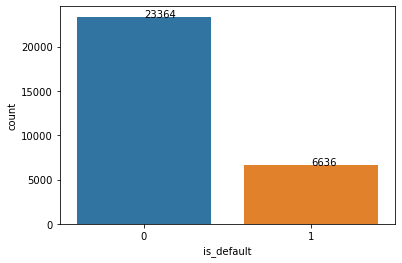

In [18]:
sns.countplot(df['is_default'])
plt.text(x = 0, y = df['is_default'].value_counts()[0] + 1, s = df['is_default'].value_counts()[0])
plt.text(x = 1, y = df['is_default'].value_counts()[1] + 1, s = df['is_default'].value_counts()[1])
plt.show()
# from the below plot it's clearly shows that there is huge imbalance in the data
# we can use SMOTE technique to balance the class distributions
# we have 23364 negative records and 6636 positive records
# so when we build model, we can't rely on accuaracy metric 

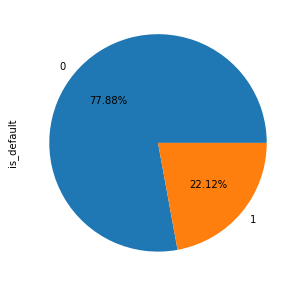

In [19]:
df['is_default'].value_counts().plot(kind='pie',autopct='%0.2f%%',figsize=(5,5))
plt.show()
# non_defaulters data is 77.88 of total data
# defaulters data is 22.12% of total data

In [20]:
df['is_default'].value_counts()/len(df)
# here we can see that the probability of getting default is 0.22

0    0.7788
1    0.2212
Name: is_default, dtype: float64

### Limit_Balance

#### Uni-variate

0.992866960519544

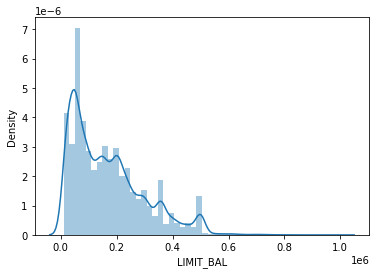

In [21]:
sns.distplot(df['LIMIT_BAL'])
df['LIMIT_BAL'].skew()
# moderately right skewed
# not normally distributed
# we have observed some peaks in the distribution where the density of customers is more at respective limit balances
# there are some extreme values who have high limit balance
# we can do transformation to attain normality

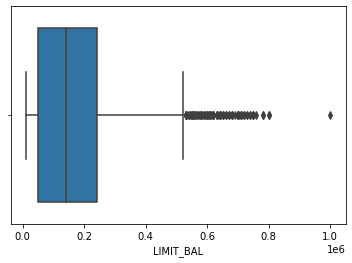

In [22]:
sns.boxplot(df['LIMIT_BAL'])
plt.show()
# there are some outliers, but we can also observe that there is only one customer who is extremely far from others

In [23]:
df[['LIMIT_BAL','is_default']].sort_values(by='LIMIT_BAL',ascending=False).head(10)
# only one person having maximum limit balance which is 1000000
# next person having 800000 limit balance
# top 10 persons who have highest limit balance are non-defaulters
# so we can replace the value 1000000 with 800000 to reduce the skewness

,LIMIT_BAL,is_default
2197,1000000.0,0
14919,800000.0,0
18006,800000.0,0
24320,780000.0,0
28715,780000.0,0
21375,760000.0,0
13186,750000.0,0
3733,750000.0,0
10089,750000.0,0
4603,750000.0,0


In [24]:
q1 = df['LIMIT_BAL'].quantile(0.25)
q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = q3-q1
df_extrm = df[(df['LIMIT_BAL']>q3) | (df['LIMIT_BAL']<q1)]
print('Total extreme values',df_extrm.shape[0])
print('Right side extremes',df[(df['LIMIT_BAL']>q3)].shape[0])
print('Left side extremes',df[df['LIMIT_BAL']<q1].shape[0])

Total extreme values 11378
Right side extremes 7067
Left side extremes 4311


0    0.860195
1    0.139805
Name: is_default, dtype: float64


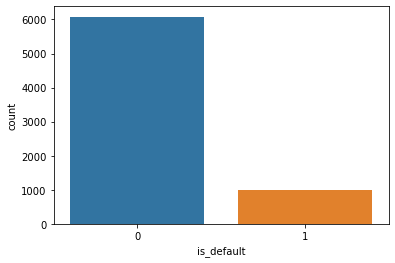

In [25]:
sns.countplot(df[(df['LIMIT_BAL']>q3)]['is_default'])
print(df[(df['LIMIT_BAL']>q3)]['is_default'].value_counts()/len(df[(df['LIMIT_BAL']>q3)]))
plt.show()
# probability of getting default in right extremes side is 0.13

0    0.639295
1    0.360705
Name: is_default, dtype: float64


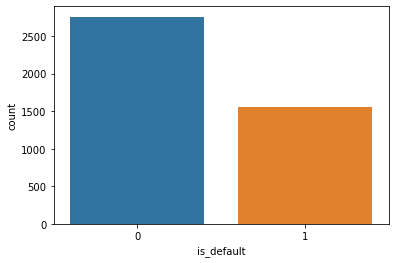

In [26]:
sns.countplot(df[(df['LIMIT_BAL']<q1)]['is_default'])
print(df[(df['LIMIT_BAL']<q1)]['is_default'].value_counts()/len(df[(df['LIMIT_BAL']<q1)]))
plt.show()
# probability of getting default in left extremes side is 0.36

0    0.780206
1    0.219794
Name: is_default, dtype: float64


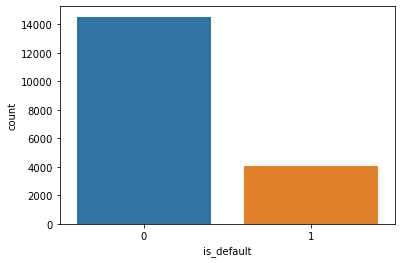

In [27]:
iqr_range = df[~((df['LIMIT_BAL']>q3) | (df['LIMIT_BAL']<q1))]
sns.countplot(iqr_range['is_default'])
print(iqr_range['is_default'].value_counts()/len(iqr_range['is_default']))
# probability of getting default in IQR range is 0.22

In [28]:
df['LIMIT_BAL'].describe()
# the mean value of limit balance is 167484 with standard deviation of 129747

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

#### 'Limit_bal' vs 'is_default'

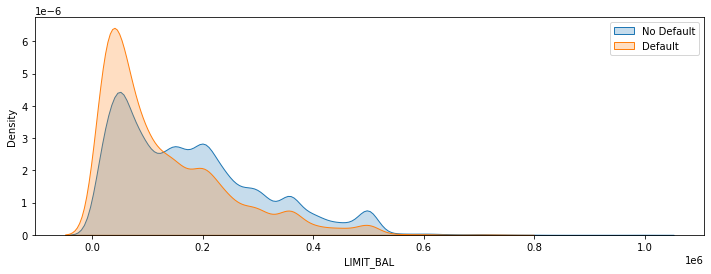

In [29]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['is_default'] == 0), 'LIMIT_BAL'],label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['is_default'] == 1), 'LIMIT_BAL'],label = 'Default', shade = True)
plt.legend()
plt.show()
# more defaulters have the limit balance between 1 to 2 lakhs

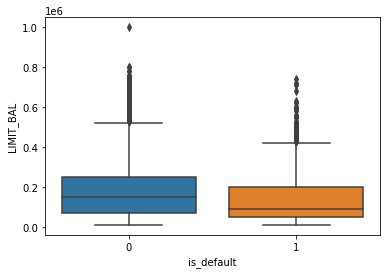

In [30]:
sns.boxplot(df['is_default'],df['LIMIT_BAL'])
plt.show()
# median is different for both the classes
# more number of defaulters have low limit balance
# defaulter class is moderately right skewed
# extreme values in both the classes

is_default
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64


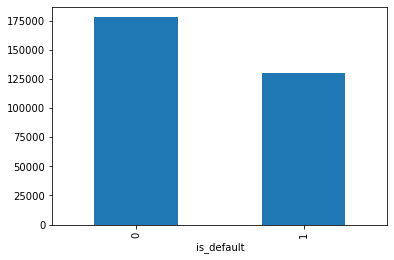

In [31]:
df.groupby('is_default')['LIMIT_BAL'].mean().plot(kind='bar')
print(df.groupby('is_default')['LIMIT_BAL'].mean())
plt.show()
# average limit balance of defaulters class is less than the average limit balance of non-defaulters class by around 48000

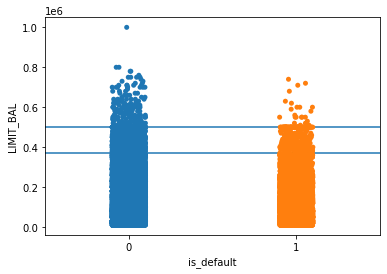

In [32]:
sns.stripplot(data=df,x='is_default',y='LIMIT_BAL')
plt.axhline(370000)
plt.axhline(500000)
# more defaulters are having limit balance below 370000
# after 370000 till 500000 there are comparatively less defaulters
# after 500000 less number of defaulters

#### Sex

#### Univariate

2    18112
1    11888
Name: SEX, dtype: int64


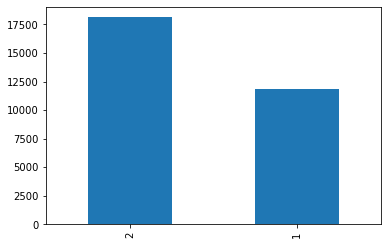

In [33]:
df['SEX'].value_counts().plot(kind='bar')
print(df['SEX'].value_counts())
plt.show()
# 1=male, 2=female
# 11888 male records and 18112 female records are there

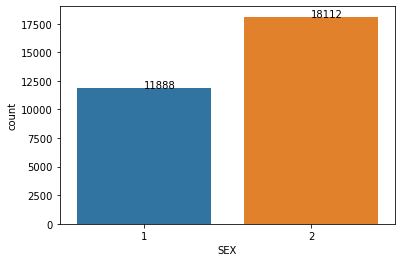

In [34]:
sns.countplot(df['SEX'])
plt.text(x = 0, y = df['SEX'].value_counts()[1] + 1, s = df['SEX'].value_counts()[1])
plt.text(x = 1, y = df['SEX'].value_counts()[2] + 1, s = df['SEX'].value_counts()[2])
plt.show()

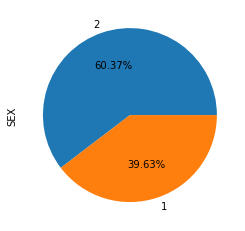

In [35]:
df['SEX'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()
# 1=male, 2=female
# female records are 60.37% of total
# male records are 39.63% of total

#### 'Sex' vs 'is_default'

SEX  is_default
1    0             0.758328
     1             0.241672
2    0             0.792237
     1             0.207763
Name: is_default, dtype: float64


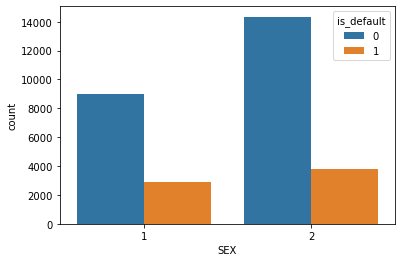

In [36]:
sns.countplot(x=df['SEX'],hue=df['is_default'])
print(df['is_default'].groupby(df['SEX']).value_counts(normalize = True))
# 24.17% of men are defaulters and 20.78% women are defaulters
# we have more women than men in the data and men have higher chance of default than women
# we can confirm it later by comparing with the education and marital status

#### EDUCATION

#### Univariate

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


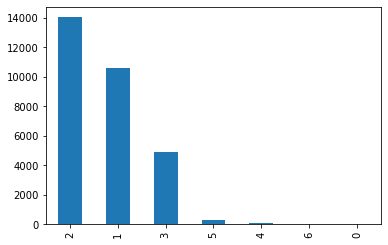

In [37]:
df['EDUCATION'].value_counts().plot(kind='bar')
print(df['EDUCATION'].value_counts())
plt.show()
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
# we have 0 here which is not given in the description
# 5 and 6 are labelled as unkonwn

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

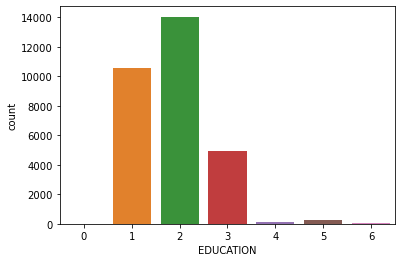

In [38]:
sns.countplot(df['EDUCATION'])

#### 'Education' vs 'is_default'

EDUCATION  is_default
0          0             1.000000
1          0             0.807652
           1             0.192348
2          0             0.762651
           1             0.237349
3          0             0.748424
           1             0.251576
4          0             0.943089
           1             0.056911
5          0             0.935714
           1             0.064286
6          0             0.843137
           1             0.156863
Name: is_default, dtype: float64


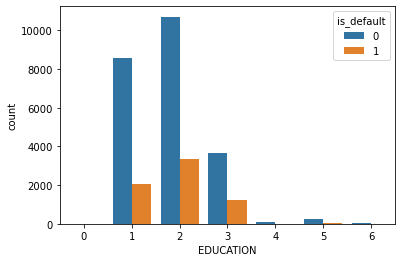

In [39]:
print(df['is_default'].groupby(df['EDUCATION']).value_counts(normalize = True))
sns.countplot(x=df['EDUCATION'],hue=df['is_default'])
plt.show()

# probabilities of default for 0,5,6 are lower than 1,2,3
# so we can add up them in 4 (others)

In [40]:
# 5,6,0 are replacing with 4 (others)
df['EDUCATION']=df['EDUCATION'].replace(5,4)
df['EDUCATION']=df['EDUCATION'].replace(6,4)
df['EDUCATION']=df['EDUCATION'].replace(0,4)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

EDUCATION  is_default
1          0             0.807652
           1             0.192348
2          0             0.762651
           1             0.237349
3          0             0.748424
           1             0.251576
4          0             0.929487
           1             0.070513
Name: is_default, dtype: float64


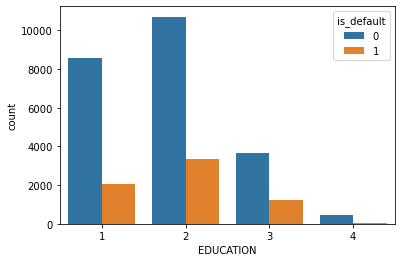

In [41]:
print(df['is_default'].groupby(df['EDUCATION']).value_counts(normalize = True))
sns.countplot(x=df['EDUCATION'],hue=df['is_default'])
plt.show()
# 1=graduate school, 2=university, 3=high school, 4=others

# customers who belongs to education sector university,graduate school & high school have comparatively high chance of default
# 4 may be lower than high school education where probability of default is lower than other classes

#### Marriage

#### Univariate

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


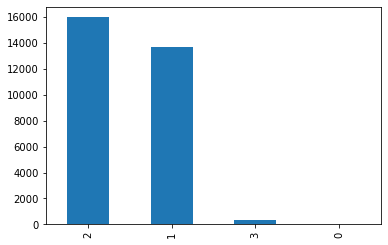

In [42]:
df['MARRIAGE'].value_counts().plot(kind='bar')
print(df['MARRIAGE'].value_counts())
plt.show()
# 1=married, 2=single, 3=others
# we have 0 here but which is not present in the description

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

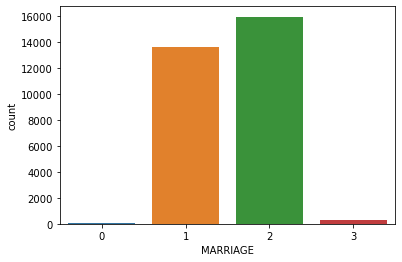

In [43]:
sns.countplot(df['MARRIAGE'])

#### 'Marriage' vs 'is_default'

MARRIAGE  is_default
0         0             0.907407
          1             0.092593
1         0             0.765283
          1             0.234717
2         0             0.790717
          1             0.209283
3         0             0.739938
          1             0.260062
Name: is_default, dtype: float64


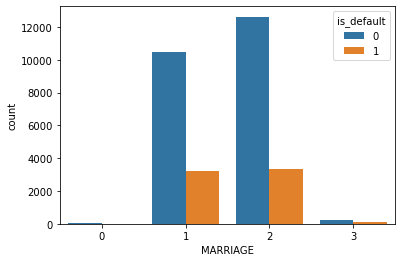

In [44]:
print(df['is_default'].groupby(df['MARRIAGE']).value_counts(normalize = True))
sns.countplot(x=df['MARRIAGE'],hue=df['is_default'])
plt.show()
# probability of default for married is higher than single
# but here the probability of default for others is higher and for the 0 is too low

#### Age

#### Univariate

0.7322458687830562

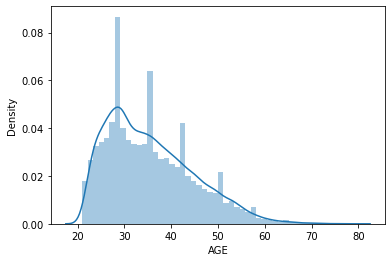

In [45]:
sns.distplot(df['AGE'])
df['AGE'].skew()
# moderately right skewed
# not normally distributed
# we have observed some peaks in the distribution where the density of customers is more at particular age's
# we can do transformation to attain normality

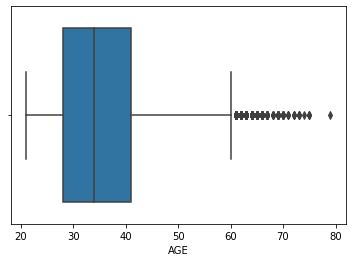

In [46]:
sns.boxplot(df['AGE'])
plt.show()
# there are some outliers in this variable

#### 'AGE' vs 'is_default'

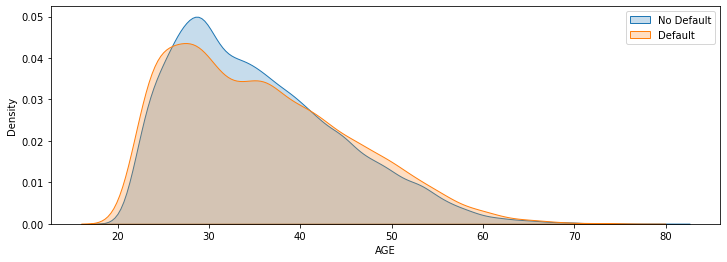

In [47]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['is_default'] == 0), 'AGE'],label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['is_default'] == 1), 'AGE'],label = 'Default', shade = True)
plt.legend()
plt.show()
# most of customers are between 25 and 40, the chance of default is a little lower than non-defaulta

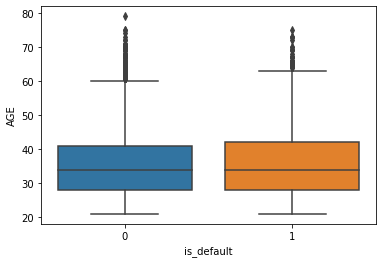

In [48]:
sns.boxplot(df['is_default'],df['AGE'])
plt.show()
# median is almost same for both the classes
# IQR is a bit more for defaulter class

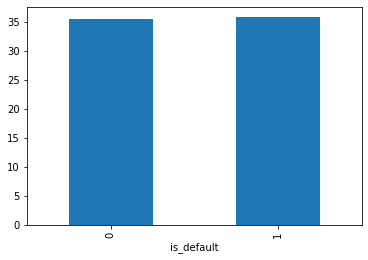

In [49]:
df.groupby('is_default')['AGE'].mean().plot(kind='bar')
plt.show()
# means of age are almost same for both the classes

<AxesSubplot:xlabel='is_default', ylabel='AGE'>

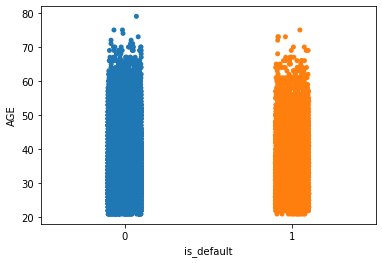

In [50]:
sns.stripplot(data=df,x='is_default',y='AGE')
# seems distribution is similar for both the classes
# here the points overlaps so hard to get where the density is more
# for better understanding we need to divide the age groups and see at which age group the percentage of defaulters are more

### Bi-variate & Multi-variate

#### ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

#### LIMIT_BAL vs SEX

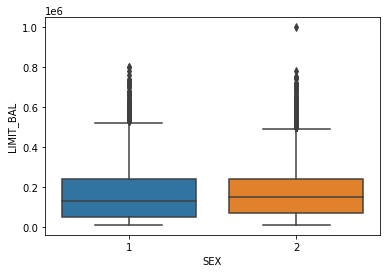

In [51]:
sns.boxplot(df['SEX'],df['LIMIT_BAL'])
plt.show()
# there is not much difference between the medians of both the classes
# IQR range is more for male than female

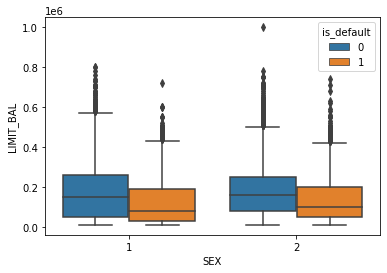

In [52]:
sns.boxplot(df['SEX'],df['LIMIT_BAL'],hue=df['is_default'])
plt.show()
# in both male and female median value for defaulter is lower than non-defaulter

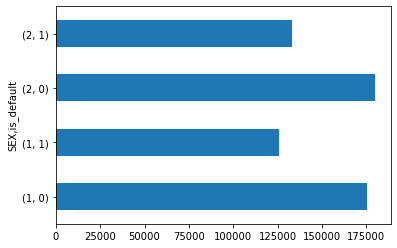

In [53]:
df.groupby(['SEX','is_default'])['LIMIT_BAL'].mean().plot(kind='barh')
plt.show()
# in both male and female the average limit balance of defaulters is less than non-defaulters
# the average limit balance of male defaulter is little less compared to female defaulters 

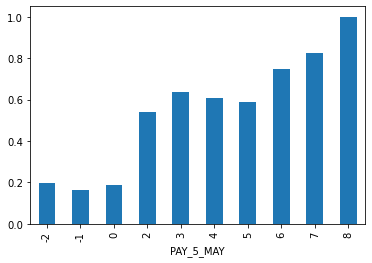

In [54]:
df.groupby(by=['PAY_5_MAY'])['is_default'].value_counts(normalize = True).to_frame()['is_default'][:,1].plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='SEX'>

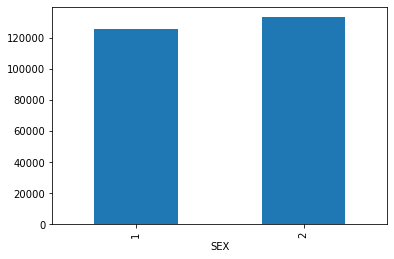

In [55]:
df.groupby(['SEX','is_default'])['LIMIT_BAL'].mean().to_frame()['LIMIT_BAL'][:,1].plot(kind='bar')

#### 'Sex' vs 'Education'

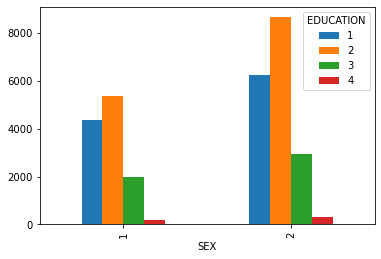

In [56]:
pd.crosstab(df['SEX'],df['EDUCATION']).plot(kind='bar')
plt.show()

#1 = graduate school; 2 = university; 3 = high school; 4 = others
# majority of records are females in all the education sectors 

EDUCATION  SEX  is_default
1          1    0             0.791915
                1             0.208085
           2    0             0.818649
                1             0.181351
2          1    0             0.737998
                1             0.262002
           2    0             0.777957
                1             0.222043
3          1    0             0.726131
                1             0.273869
           2    0             0.763580
                1             0.236420
4          1    0             0.917647
                1             0.082353
           2    0             0.936242
                1             0.063758
Name: is_default, dtype: float64


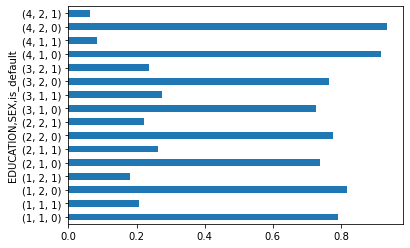

In [57]:
df.groupby(by=['EDUCATION', 'SEX'])['is_default'].value_counts(normalize = True).plot(kind='barh')
print(df.groupby(by=['EDUCATION', 'SEX'])['is_default'].value_counts(normalize = True))
plt.show()
# here we can see that in all the edu sectors, the probability of default was higher for men

In [58]:
df.groupby(by=['EDUCATION', 'SEX'])['is_default'].value_counts(normalize = True).to_frame()['is_default']

EDUCATION  SEX  is_default
1          1    0             0.791915
                1             0.208085
           2    0             0.818649
                1             0.181351
2          1    0             0.737998
                1             0.262002
           2    0             0.777957
                1             0.222043
3          1    0             0.726131
                1             0.273869
           2    0             0.763580
                1             0.236420
4          1    0             0.917647
                1             0.082353
           2    0             0.936242
                1             0.063758
Name: is_default, dtype: float64

#### 'EDUCATION' vs 'MARRIAGE'

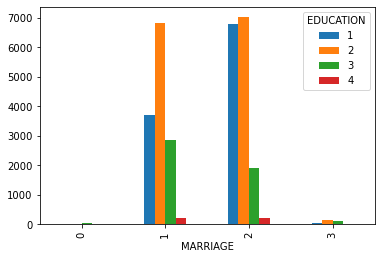

In [59]:
pd.crosstab(df['MARRIAGE'],df['EDUCATION']).plot(kind='bar')
plt.show()
# 1 = married; 2 = single; 3 = others
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
# most of the married and single are educated
# we have 0 in 'marriage' column, from this plot most of their education till high school

MARRIAGE  EDUCATION  is_default
0         1          0             1.000000
          2          0             0.833333
                     1             0.166667
          3          0             0.909091
                     1             0.090909
1         1          0             0.793391
                     1             0.206609
          2          0             0.756504
                     1             0.243496
          3          0             0.736456
                     1             0.263544
          4          0             0.927350
                     1             0.072650
2         1          0             0.815832
                     1             0.184168
          2          0             0.769373
                     1             0.230627
          3          0             0.763227
                     1             0.236773
          4          0             0.929204
                     1             0.070796
3         1          0             0.740000


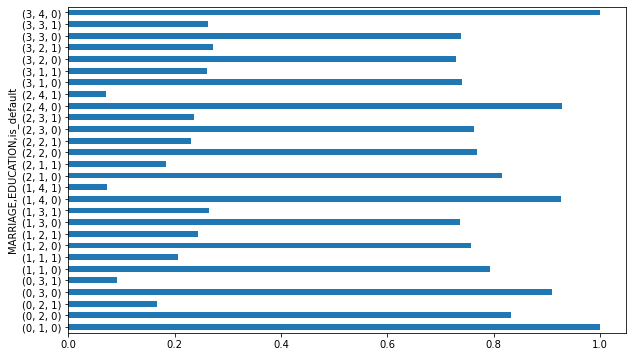

In [60]:
plt.figure(figsize=(10,6))
df.groupby(by=['MARRIAGE', 'EDUCATION'])['is_default'].value_counts(normalize = True).plot(kind='barh')
print(df.groupby(by=['MARRIAGE', 'EDUCATION'])['is_default'].value_counts(normalize = True))
plt.show()

# prob of educated people who got married being default is 0.22 (avg)
# prob of educated people who are single being default is 0.21 (avg)
# prob of others who are educated being default is comparatively more than married and singleb

In [61]:
df_MDD = df.groupby(by=['MARRIAGE', 'EDUCATION'])['is_default'].value_counts(normalize = True).to_frame()
df_MDD.columns=['prob_default']
df_MDD['prob_default'].values

array([1.        , 0.83333333, 0.16666667, 0.90909091, 0.09090909,
       0.79339065, 0.20660935, 0.75650395, 0.24349605, 0.73645578,
       0.26354422, 0.92735043, 0.07264957, 0.81583199, 0.18416801,
       0.76937322, 0.23062678, 0.76322682, 0.23677318, 0.92920354,
       0.07079646, 0.74      , 0.26      , 0.72839506, 0.27160494,
       0.73786408, 0.26213592, 1.        ])

#### 'MARRIAGE' vs 'AGE'

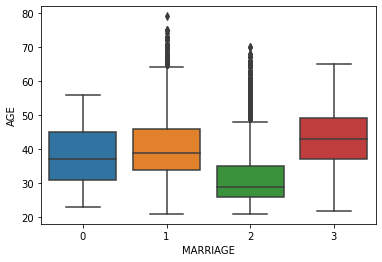

In [62]:
sns.boxplot(df['MARRIAGE'],df['AGE'])
plt.show()

# 1 = married; 2 = single; 3 = others
# 0,1,3 are similar, there IQR is between 30 and 50
# medians of 0 and 1 are nearer to (below)40 but for 3 is above 40
# median is nearer to 30 for class 2 (single's)
# extreme values are there in married and single 

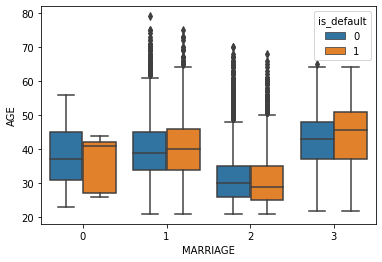

In [63]:
sns.boxplot(df['MARRIAGE'],df['AGE'],hue=df['is_default'])
plt.show()

# median for defaulter and non-defaulter in married and single classes are almost same 
# there is some difference between the medians of defaulter and non-defaulter in class3
# there is some difference between the medians of defaulter and non-defaulter in class0 and are similar to class3
# we can addup 0 and 3 classes

<AxesSubplot:xlabel='MARRIAGE'>

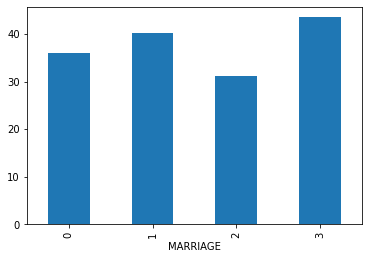

In [64]:
df.groupby(['MARRIAGE','is_default'])['AGE'].mean().to_frame()['AGE'][:,1].plot(kind='bar')

In [65]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#### 'AGE' vs 'LIMIT_BAL'

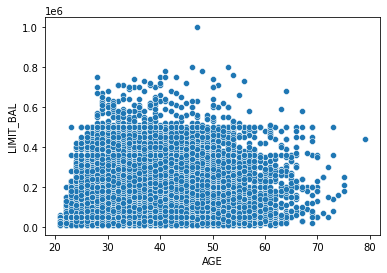

In [66]:
sns.scatterplot(df['AGE'],df['LIMIT_BAL'])
plt.show()

# there is no correlation between these two variables
# most of the high limit balance(>5lakh) card holders age is between 30 to 60

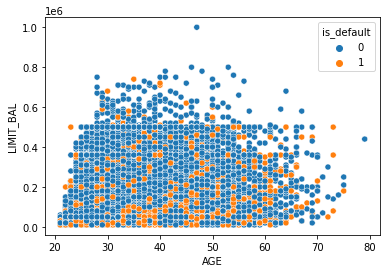

In [67]:
sns.scatterplot(df['AGE'],df['LIMIT_BAL'],hue=df['is_default'])
plt.show()

# In all the age's who have high limit balance are less likely to default
# who have low limit balance are more likely to default

#### 'LIMIT_BAL' vs 'MARRIAGE'

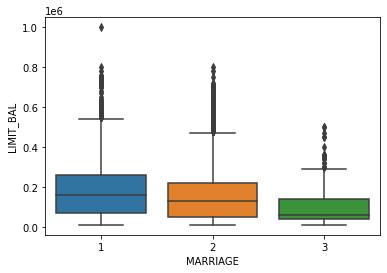

In [68]:
sns.boxplot(df['MARRIAGE'],df['LIMIT_BAL'])
plt.show()

# median and IQR are different for all the classes
# for married IQR is high for class3 IQR is low
# extreme values are present in all the classes

In [69]:
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

MARRIAGE
1    182200.893184
2    156413.660737
3    103076.923077
Name: LIMIT_BAL, dtype: float64

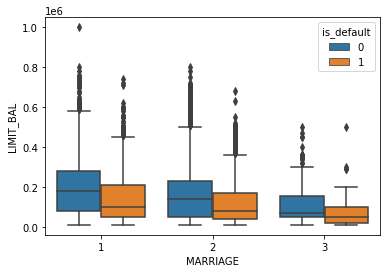

In [70]:
sns.boxplot(df['MARRIAGE'],df['LIMIT_BAL'],hue=df['is_default'])
plt.show()

# In all the classes people with low limit balance are likely to default
# In all the classes both default and non-default sub-classes have extreme values

#### 'SEX' vs 'MARRIAGE'

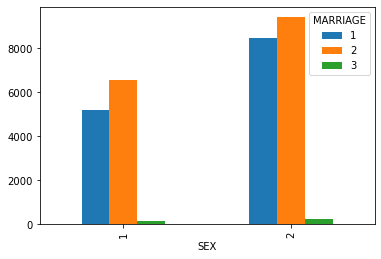

In [71]:
pd.crosstab(df['SEX'],df['MARRIAGE']).plot(kind='bar')
plt.show()

# in both female and male most of the people are married followed by single with small difference

MARRIAGE  SEX  is_default
1         1    0             0.740655
               1             0.259345
          2    0             0.780375
               1             0.219625
2         1    0             0.773386
               1             0.226614
          2    0             0.802784
               1             0.197216
3         1    0             0.710345
               1             0.289655
          2    0             0.797414
               1             0.202586
Name: is_default, dtype: float64


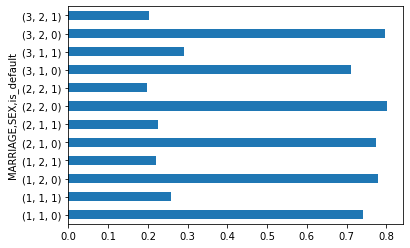

In [72]:
df.groupby(by=['MARRIAGE', 'SEX'])['is_default'].value_counts(normalize = True).plot(kind='barh')
print(df.groupby(by=['MARRIAGE', 'SEX'])['is_default'].value_counts(normalize = True))
plt.show()
# married male has more prob of being default than female
# single male has more prob of being default than female
# In others also male has more prob of being default than femaleb

#### 'Sex' vs 'Age'

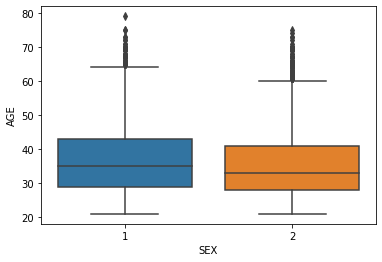

In [73]:
sns.boxplot(df['SEX'],df['AGE'])
plt.show()

# IQR is more for male than female
# median for female class is just a little less than male
# both classes have extreme values

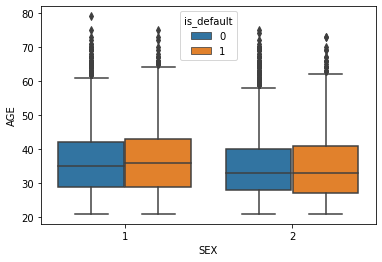

In [74]:
sns.boxplot(df['SEX'],df['AGE'],hue=df['is_default'])
plt.show()

# in both the classes median and IQR is same for defaulters and non-defaulters

In [75]:
df.groupby(['SEX','is_default'])['AGE'].mean()

SEX  is_default
1    0             36.428619
     1             36.804386
2    0             34.781866
     1             34.902206
Name: AGE, dtype: float64

#### 'Education' vs 'Age'

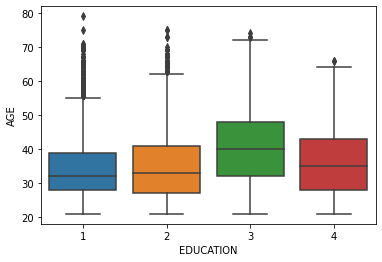

In [76]:
sns.boxplot(df['EDUCATION'],df['AGE'])
plt.show()

# 1 = graduate school; 2 = university; 3 = high school; 4 = others
# median age for class1,class2 and class4 are nearly same but for class3 median is nearly 40 which is more than other 3
# class1 and class2 have extreme values
# class3 distribution is more

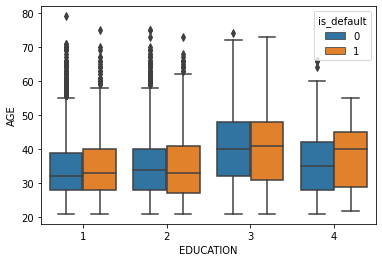

In [77]:
sns.boxplot(df['EDUCATION'],df['AGE'],hue=df['is_default'])
plt.show()

# IQR and median for defaulter and non-defaulter in class 1,2 and 3 are almost same 
# for class4 median of defaulter is more than non-defaulter
# distribution of class3 is more
# age of defaulters and non-defaulters in class1, class2 have outliers 

EDUCATION  is_default
1          0             34.137443
           1             34.628193
2          0             34.728037
           1             34.703003
3          0             40.327446
           1             40.218270
4          0             35.983908
           1             38.242424
Name: AGE, dtype: float64


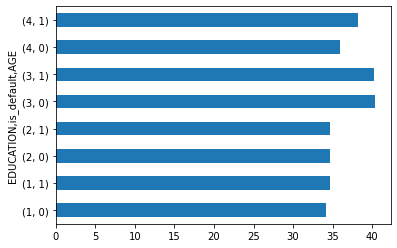

In [78]:
df.groupby(['EDUCATION','is_default'])['AGE'].mean().plot(kind='barh')
print(df.groupby(['EDUCATION','is_default'])['AGE'].mean())
plt.ylabel('EDUCATION,is_default,AGE')
plt.show()


<AxesSubplot:>

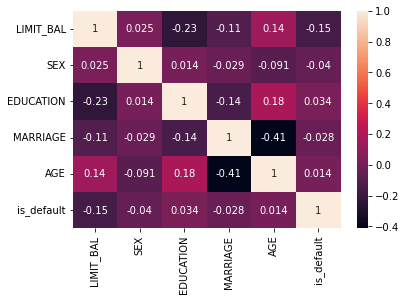

In [79]:
sns.heatmap(df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','is_default']].corr(),annot=True)

# only marriage and age have some moderate negative correlation 
# no other pair of variables have considerable correlation

#### ['PAY_1_SEP', 'PAY_2_AUG','PAY_3_JUL', 'PAY_4_JUN', 'PAY_5_MAY', 'PAY_6_APR']

In [80]:
df.iloc[:,[5,6,7,8,9,10]].describe()
# we have -2 and 0 in this variable which are not stated in the description

,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [81]:
for col in df.iloc[:,[5,6,7,8,9,10]].columns:
    print('\n')
    print(df[col].value_counts())



 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1_SEP, dtype: int64


 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2_AUG, dtype: int64


 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3_JUL, dtype: int64


 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4_JUN, dtype: int64


 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5_MAY, dtype: int64


 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6_APR, dtype: int64


<AxesSubplot:xlabel='PAY_1_SEP', ylabel='LIMIT_BAL'>

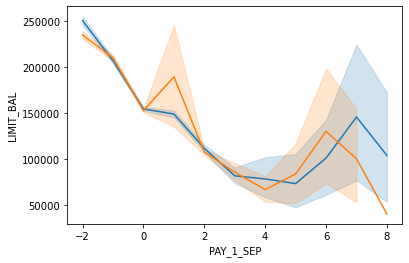

In [82]:
#df.groupby('PAY_1_SEP')['LIMIT_BAL'].mean()
sns.lineplot(df['PAY_1_SEP'],df['LIMIT_BAL'])
sns.lineplot(df['PAY_2_AUG'],df['LIMIT_BAL'])

#### Univariate

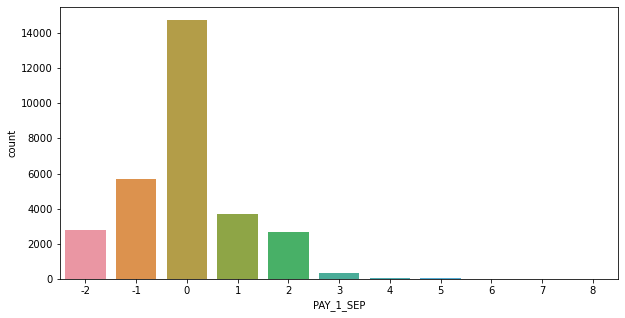

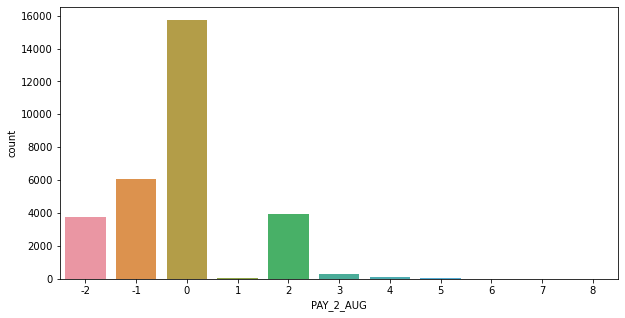

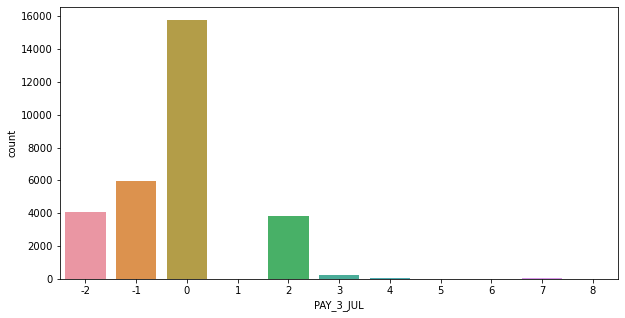

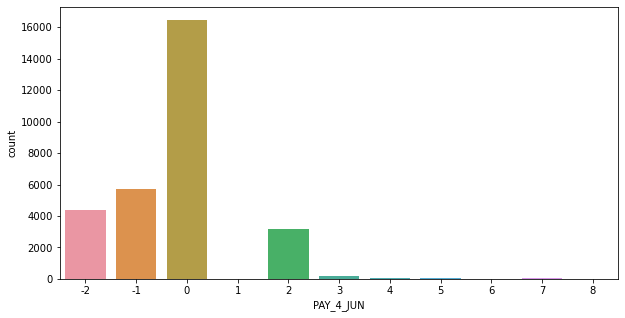

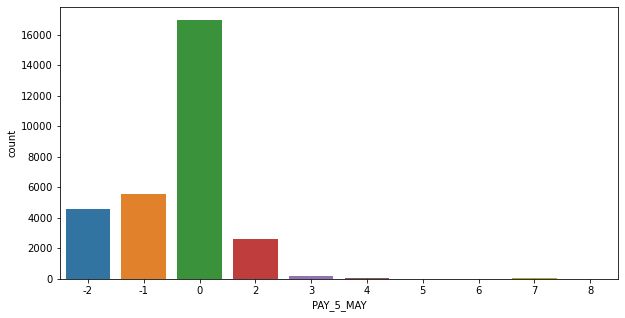

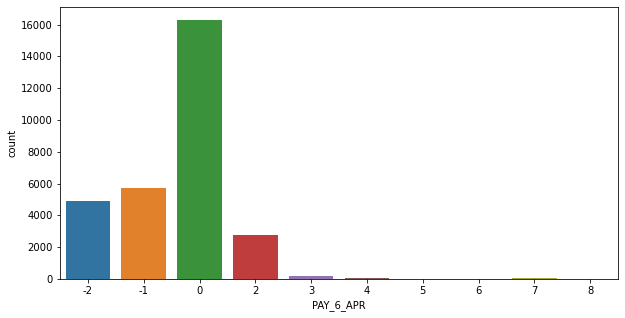

In [83]:
for col in df.iloc[:,[5,6,7,8,9,10]].columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, data = df)
    plt.show()
    
# there are only a few customers with 4+ months of delay in all PAY_X features
# from 2 to 8 in all the pay_x features the count is in decreasing manner

#### Bivariate

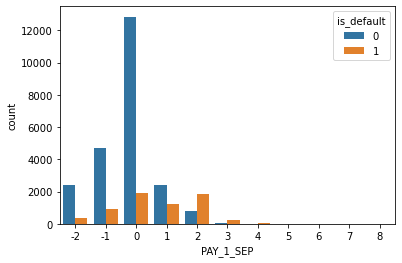

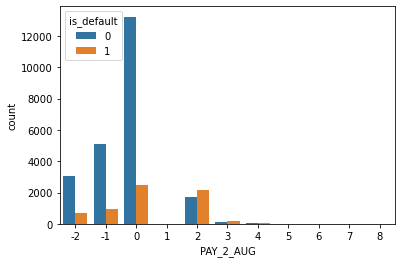

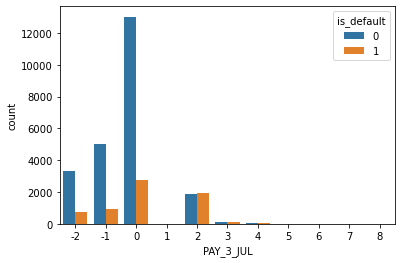

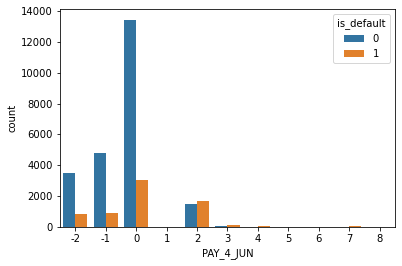

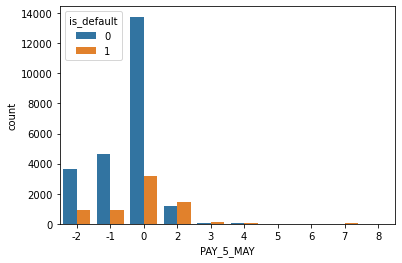

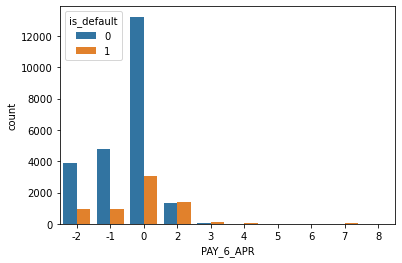

In [84]:
for col in df.iloc[:,[5,6,7,8,9,10]].columns:
    sns.countplot(df[col],hue=df['is_default'])
    plt.show()
    
# most of the customers pay duly, prob of default is much low
# the earlier the payment is made lesser are the chances of those clients defaulting the payment

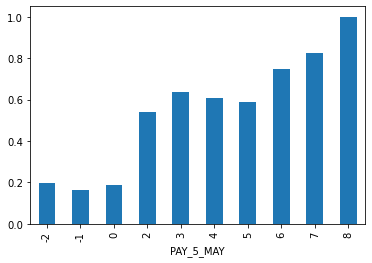

In [85]:

df.groupby(by=['PAY_5_MAY'])['is_default'].value_counts(normalize = True).to_frame()['is_default'][:,1].plot(kind='bar')
plt.show()


In [86]:
df.groupby(by=['PAY_5_MAY'])['is_default'].value_counts(normalize = True)

PAY_5_MAY  is_default
-2         0             0.803124
           1             0.196876
-1         0             0.838057
           1             0.161943
 0         0             0.811471
           1             0.188529
 2         1             0.541889
           0             0.458111
 3         1             0.634831
           0             0.365169
 4         1             0.607143
           0             0.392857
 5         1             0.588235
           0             0.411765
 6         1             0.750000
           0             0.250000
 7         1             0.827586
           0             0.172414
 8         1             1.000000
Name: is_default, dtype: float64

In [87]:
pay_df = df.iloc[:,[5,6,7,8,9,10]]
pay_df.head()

,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


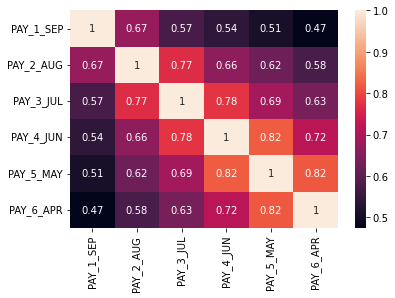

In [88]:
sns.heatmap(df.iloc[:,[5,6,7,8,9,10]].corr(),annot=True)
plt.show()
# correlation is more for successive months and decreasing when the distance between the months increasing
# correlation is high between april and may
# correlation is low between september and april

#### [BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR]

In [89]:
df_billamt = df.iloc[:,[11,12,13,14,15,16]]
df_billamt.head()

,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0


<AxesSubplot:xlabel='BILL_AMT1_SEP', ylabel='LIMIT_BAL'>

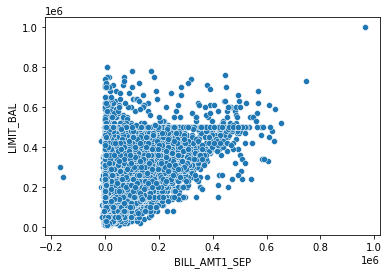

In [90]:
sns.scatterplot(df['BILL_AMT1_SEP'],df['LIMIT_BAL'])

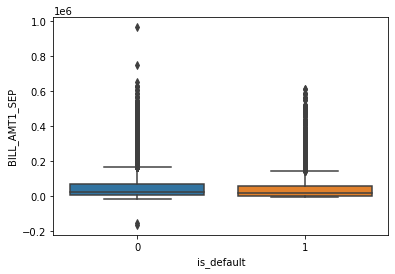

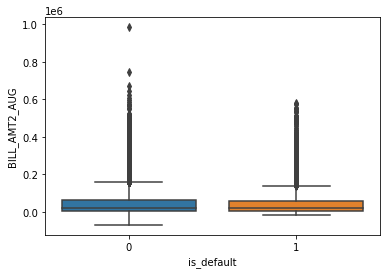

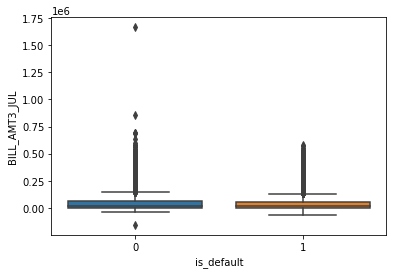

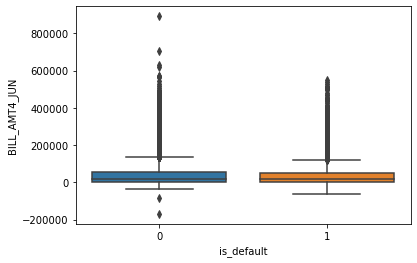

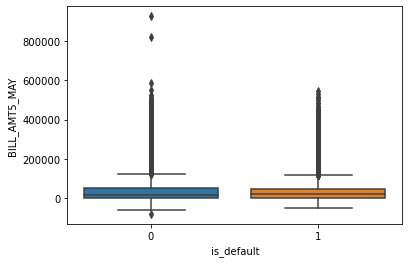

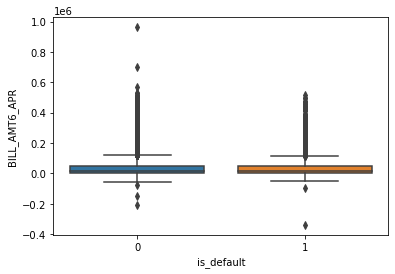

In [91]:
for col in df.iloc[:,[11,12,13,14,15,16]]:
    sns.boxplot(df['is_default'],df[col])
    plt.show()

In [92]:
df.iloc[:,12:18].describe()

,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500
std,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354
min,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000
25%,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000
50%,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000
75%,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000
max,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000


In [93]:
df_billamt.describe()
# have negative values in the all te bill amount features

,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


#### Uni-variate

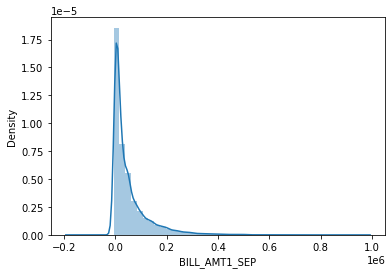

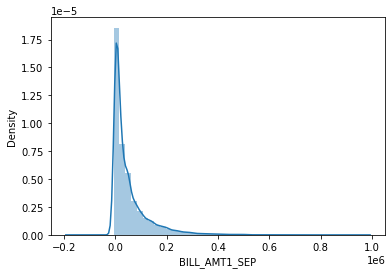

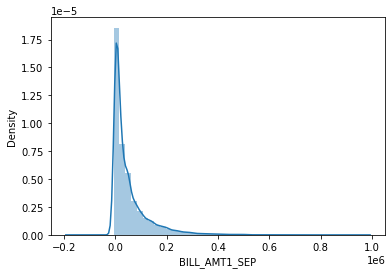

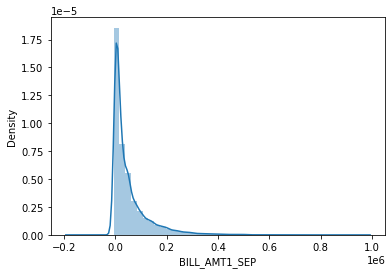

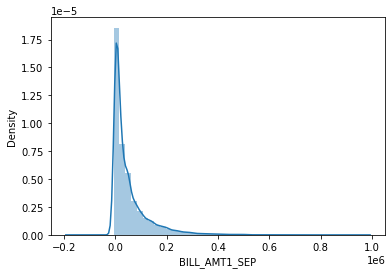

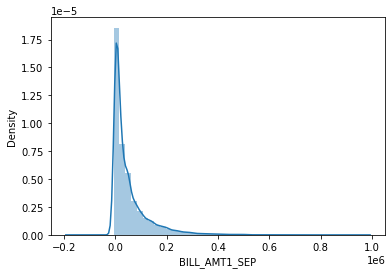

In [94]:
for col in df_billamt.columns:
    sns.distplot(df['BILL_AMT1_SEP'])
    plt.show()
# distrbution is same for all the bill amount features
# from 0 to 1L there is high peak in all the bill amount features (more customers are in that range)

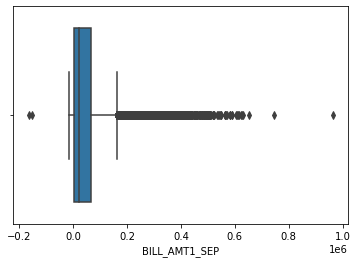

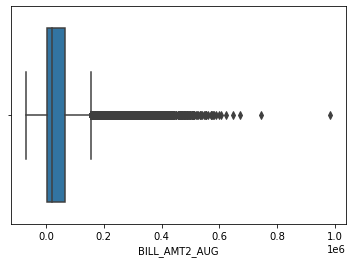

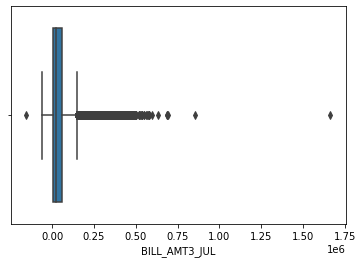

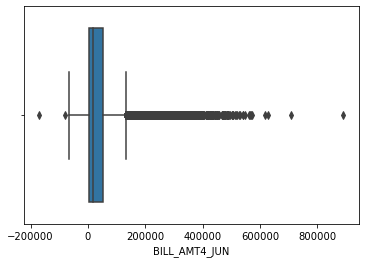

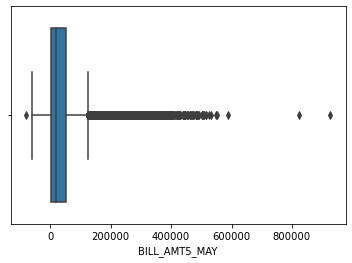

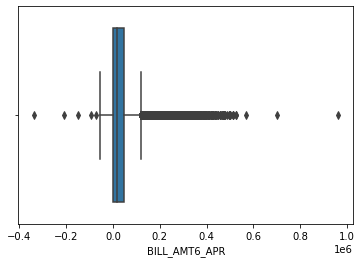

In [95]:
for col in df_billamt.columns:
    sns.boxplot(df[col])
    plt.show()

#### Bi-variate

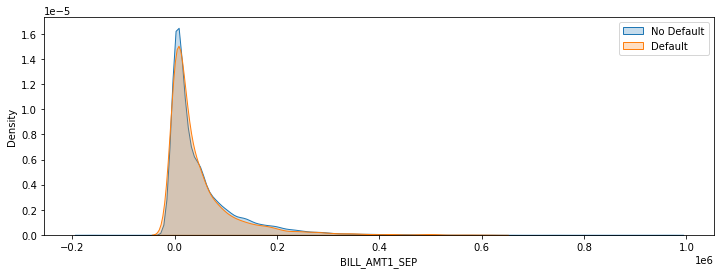

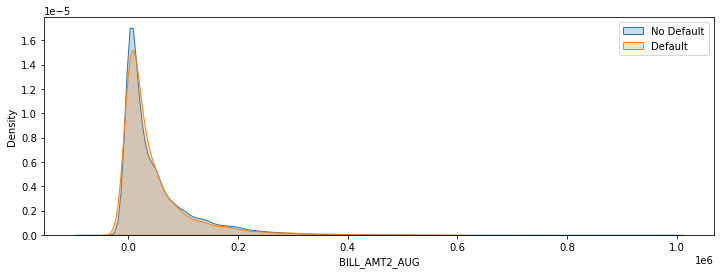

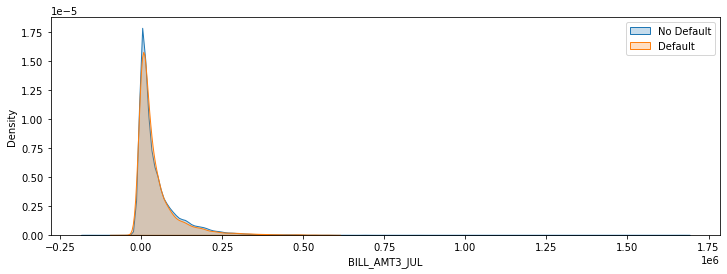

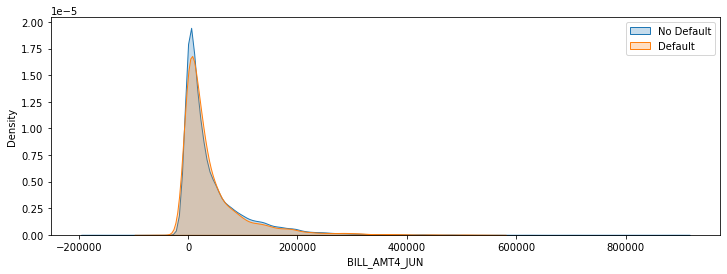

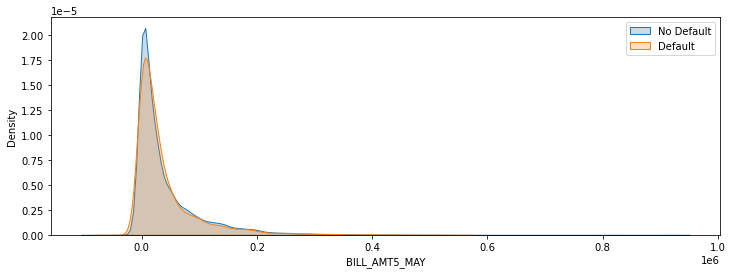

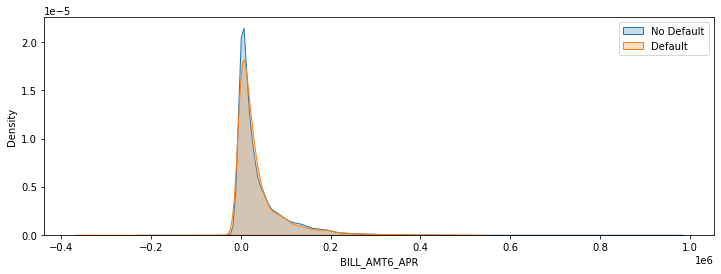

In [96]:
for col in df_billamt.columns:
    plt.figure(figsize=(12,4))
    sns.kdeplot(df.loc[(df['is_default'] == 0), col],label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['is_default'] == 1), col],label = 'Default', shade = True)
    plt.legend()
    plt.show()
    
# between the range 0 and 1L we have slightly more non-defaulters than defaulters
# we can see the clear picture and understand how the distribution and probability is by segregating them in bins 

In [97]:
billamt_0 = df.iloc[:,[11,12,13,14,15,16,23]][df.iloc[:,[11,12,13,14,15,16,23]]['is_default']==0]
billamt_1 = df.iloc[:,[11,12,13,14,15,16,23]][df.iloc[:,[11,12,13,14,15,16,23]]['is_default']==1]

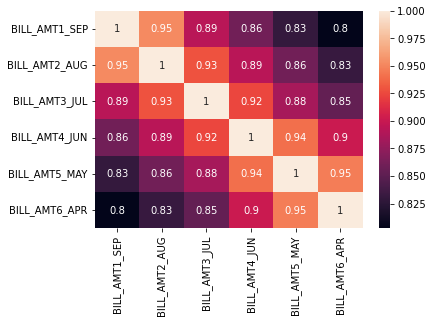

In [98]:
sns.heatmap(df_billamt.corr(),annot=True)
plt.show()
# All the variables are highly positively correlated with each other

#### [PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR]

In [99]:
df_payamt = df.iloc[:,[17,18,19,20,21,22]]
df_payamt.head()

,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR
0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [100]:
df.iloc[:,[17,18,19,20,21,22]].describe()

,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [101]:
payamt_0 = df.iloc[:,[17,18,19,20,21,22,23]][df.iloc[:,[17,18,19,20,21,22,23]]['is_default']==0]
payamt_1 = df.iloc[:,[17,18,19,20,21,22,23]][df.iloc[:,[17,18,19,20,21,22,23]]['is_default']==1]

#### Uni-variate

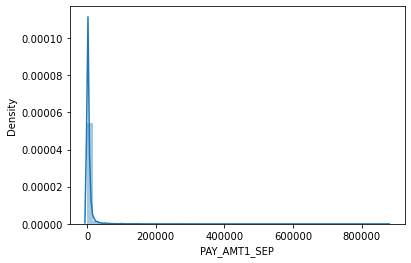

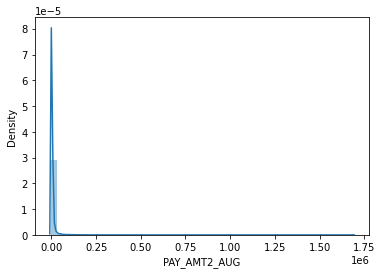

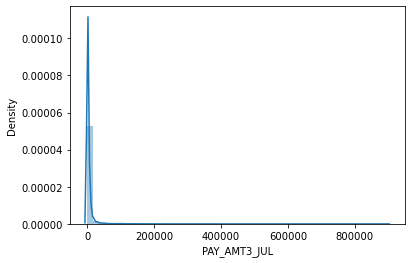

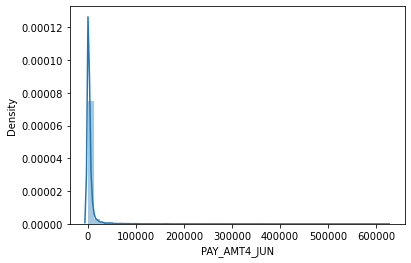

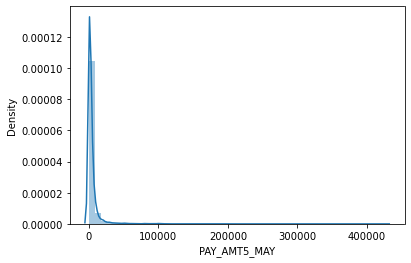

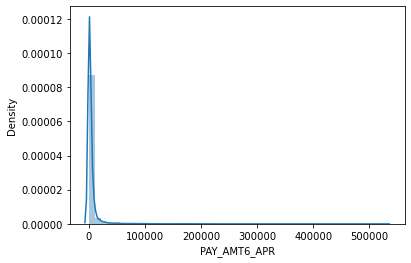

In [102]:
for col in df_payamt.columns:
    sns.distplot(df[col])
    plt.show()
# distrbution is same for all the pay amount features
# we can see from the below distribution plots, most of the records are at one place

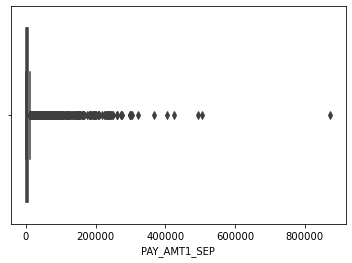

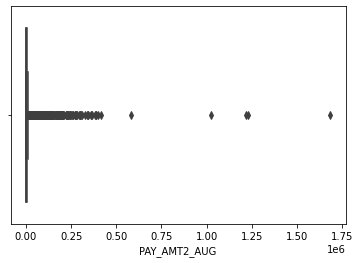

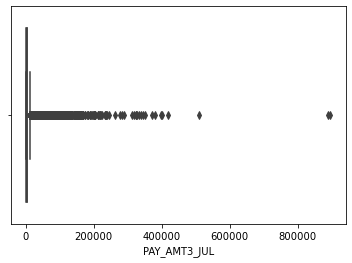

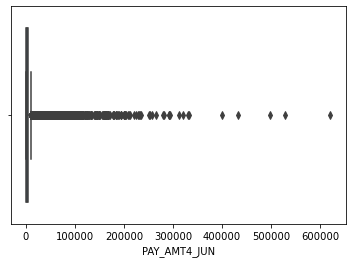

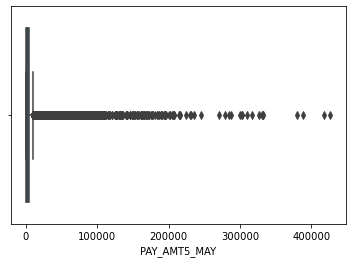

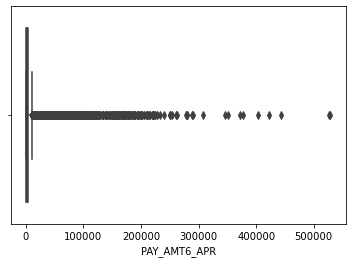

In [103]:
for col in df_payamt.columns:
    sns.boxplot(df[col])
    plt.show()

#### Bi-variate

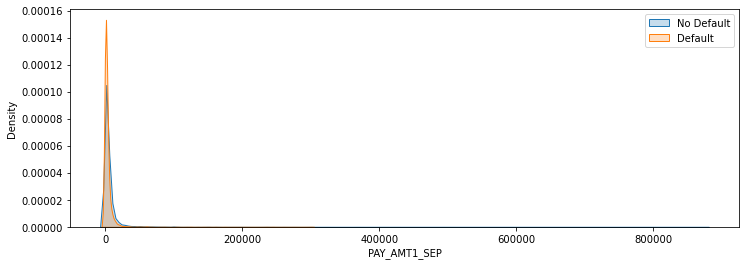

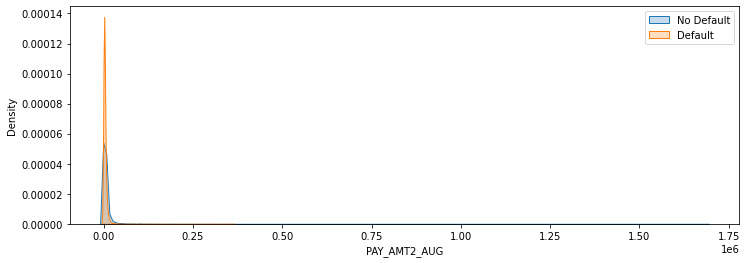

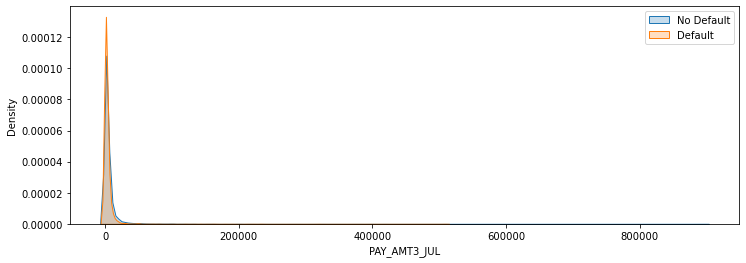

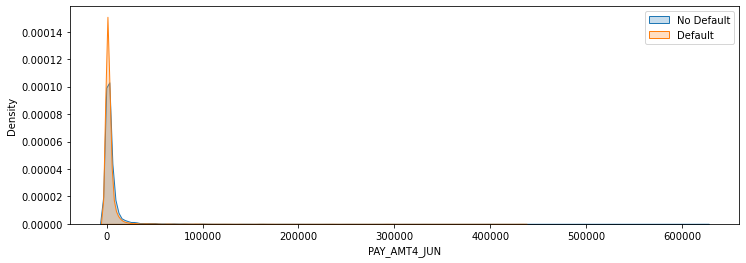

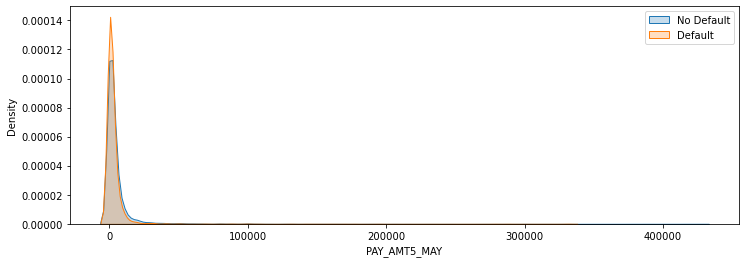

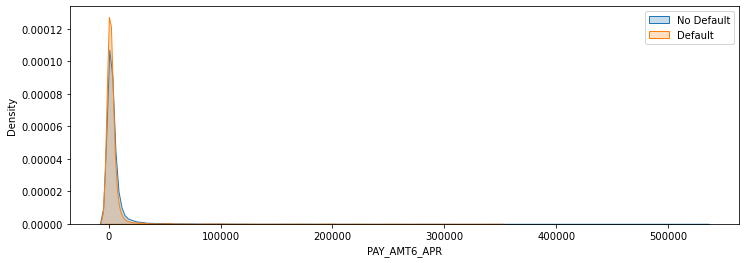

In [104]:
for col in df_payamt.columns:
    plt.figure(figsize=(12,4))
    sns.kdeplot(df.loc[(df['is_default'] == 0), col],label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['is_default'] == 1), col],label = 'Default', shade = True)
    plt.legend()
    plt.show()

# the defaulters in range of 0-60k are higher in number compared to non defaulters
# so we can segregate them in bins to analize them 

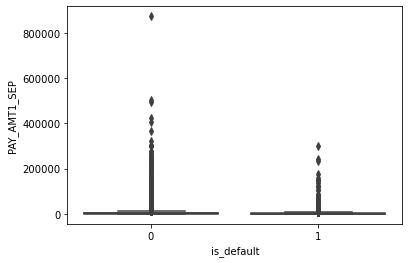

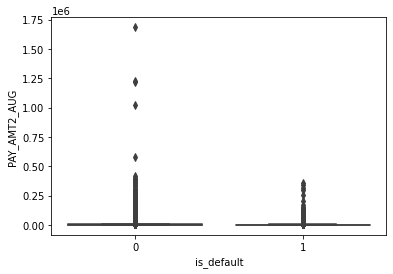

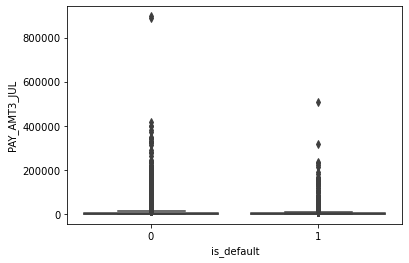

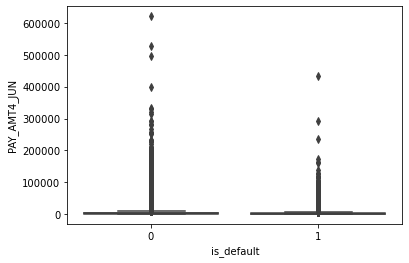

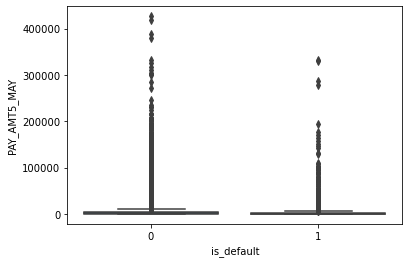

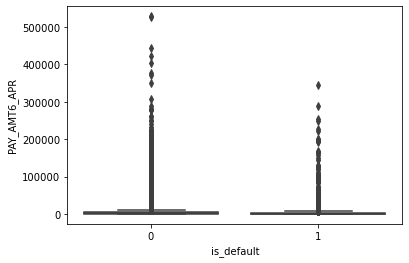

In [105]:
for col in df.iloc[:,17:23]:
    sns.boxplot(df['is_default'],df[col])
    plt.show()

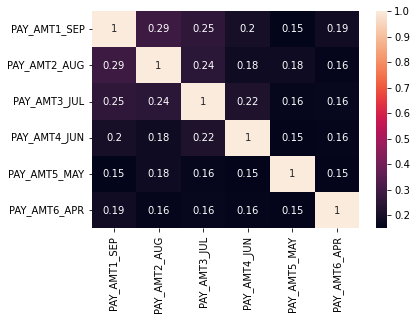

In [106]:
sns.heatmap(df.iloc[:,17:23].corr(),annot=True)
plt.show()
# there is not much correlation between these variables

In [107]:
df_stmt=df[['LIMIT_BAL','BILL_AMT3_JUL','PAY_AMT2_AUG','PAY_2_AUG','BILL_AMT2_AUG','PAY_AMT1_SEP','PAY_1_SEP','is_default']]
df_stmt.head()

,LIMIT_BAL,BILL_AMT3_JUL,PAY_AMT2_AUG,PAY_2_AUG,BILL_AMT2_AUG,PAY_AMT1_SEP,PAY_1_SEP,is_default
0,20000.0,689.0,689.0,2,3102.0,0.0,2,1
1,120000.0,2682.0,1000.0,2,1725.0,0.0,-1,1
2,90000.0,13559.0,1500.0,0,14027.0,1518.0,0,0
3,50000.0,49291.0,2019.0,0,48233.0,2000.0,0,0
4,50000.0,35835.0,36681.0,0,5670.0,2000.0,-1,0


In [108]:
df_stmt[df_stmt['is_default']==0].sort_values(by='LIMIT_BAL',ascending=False).head(10)

# Amount of bill statement in July     -   'BILL_AMT3_JUL'
# Amount of previous payment in August -   'PAY_AMT2_AUG'
# Repayment status in August           -   'PAY_2_AUG'

,LIMIT_BAL,BILL_AMT3_JUL,PAY_AMT2_AUG,PAY_2_AUG,BILL_AMT2_AUG,PAY_AMT1_SEP,PAY_1_SEP,is_default
2197,1000000.0,535020.0,50723.0,0,983931.0,50784.0,0,0
14919,800000.0,64535.0,64657.0,-1,5552.0,11145.0,-1,0
18006,800000.0,3810.0,3832.0,-2,4636.0,4644.0,-2,0
28715,780000.0,38686.0,39558.0,-2,61715.0,62819.0,-2,0
24320,780000.0,190663.0,15004.0,0,178587.0,10000.0,0,0
21375,760000.0,462497.0,19500.0,0,455970.0,20011.0,0,0
3733,750000.0,74635.0,74640.0,-1,99628.0,99664.0,-1,0
4603,750000.0,3329.0,3691.0,-2,15344.0,15420.0,-2,0
13186,750000.0,401003.0,401003.0,-1,9655.0,250000.0,1,0
10089,750000.0,92767.0,2330.0,0,163441.0,6817.0,0,0


In [109]:
df_stmt[df_stmt['is_default']==1].sort_values(by='LIMIT_BAL',ascending=False).head(10)

# we can see that the bill amount of this month need to pay in the next month which is pay amount
# if some amount is paid then the remaining balance is add up to the next bill amount

,LIMIT_BAL,BILL_AMT3_JUL,PAY_AMT2_AUG,PAY_2_AUG,BILL_AMT2_AUG,PAY_AMT1_SEP,PAY_1_SEP,is_default
13883,740000.0,1477.0,1487.0,-1,8154.0,8229.0,2,1
26921,720000.0,158694.0,6000.0,0,209976.0,8500.0,0,1
3402,710000.0,0.0,0.0,-2,0.0,0.0,-2,1
19251,680000.0,10251.0,10296.0,0,-45.0,0.0,0,1
10895,630000.0,490093.0,12371.0,0,497921.0,15868.0,0,1
527,620000.0,160440.0,6200.0,2,156839.0,0.0,2,1
451,600000.0,469703.0,18000.0,2,458862.0,0.0,2,1
15593,600000.0,458862.0,0.0,2,467150.0,17000.0,2,1
14083,600000.0,237135.0,10561.0,0,230414.0,8773.0,0,1
19108,590000.0,0.0,0.0,-2,0.0,0.0,-2,1


# Feature engineering

In [110]:
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,is_default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


#### AGE-Bins

In [111]:
age_bin=[]
for i in df['AGE']:
    if i in range(21,31):
        age_bin.append('21-30')
    if i in range(31,41):
        age_bin.append('31-40')
    if i in range(41,51):
        age_bin.append('41-50')
    if i in range(51,61):
        age_bin.append('51-60')
    if i in range(61,71):
        age_bin.append('61-70')
    if i in range(71,81):
        age_bin.append('71-80')
len(age_bin)

30000

In [112]:
df_bins = df[['is_default']]
df_bins['Age_bins'] = age_bin
df_bins.head()

,is_default,Age_bins
0,1,21-30
1,1,21-30
2,0,31-40
3,0,31-40
4,0,51-60


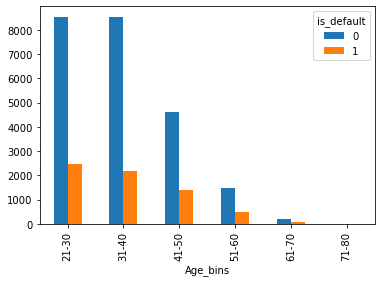

In [113]:
pd.crosstab(df_bins['Age_bins'],df_bins['is_default']).plot(kind='bar')
plt.show()
# from this plot we can see number of customers and defaulters count decreases with increase in age but its not percentage

In [114]:
print(df_bins.groupby(by='Age_bins')['is_default'].value_counts(normalize = True))
plt.show()

Age_bins  is_default
21-30     0             0.775629
          1             0.224371
31-40     0             0.795669
          1             0.204331
41-50     0             0.767027
          1             0.232973
51-60     0             0.747621
          1             0.252379
61-70     0             0.735409
          1             0.264591
71-80     0             0.666667
          1             0.333333
Name: is_default, dtype: float64


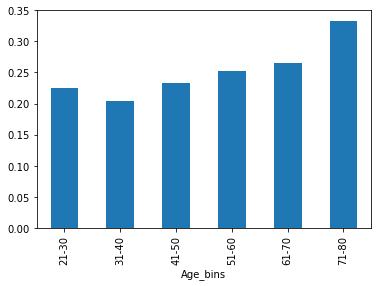

In [115]:
df_bins.groupby(by='Age_bins')['is_default'].value_counts(normalize = True).to_frame()['is_default'][:,1].plot(kind='bar')
plt.show()

# probability of being default increases with increase in age groups

<AxesSubplot:xlabel='Age_bins', ylabel='LIMIT_BAL'>

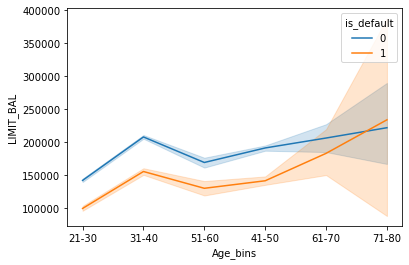

In [116]:
sns.lineplot(df_bins['Age_bins'],df['LIMIT_BAL'],hue=df['is_default'])

In [117]:
df_fe1 = df.copy()

In [118]:
df_fe1['due1'] = df['BILL_AMT6_APR']-df['PAY_AMT5_MAY']
df_fe1['due2'] = df['BILL_AMT5_MAY']-df['PAY_AMT4_JUN']
df_fe1['due3'] = df['BILL_AMT4_JUN']-df['PAY_AMT3_JUL']
df_fe1['due4'] = df['BILL_AMT3_JUL']-df['PAY_AMT2_AUG']
df_fe1['due5'] = df['BILL_AMT2_AUG']-df['PAY_AMT1_SEP']

In [119]:
df_fe1['payment_value'] = df['PAY_1_SEP'] + df['PAY_2_AUG'] + df['PAY_3_JUL'] + df['PAY_4_JUN'] + df['PAY_5_MAY'] + df['PAY_6_APR']

In [120]:
df_fe1[['due1','due2','due3','due4','due5','is_default']].describe()

,due1,due2,due3,due4,due5,is_default
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000
mean,34072.372767,35485.324100,38037.267467,4.109199e+04,43515.494667,0.221200
std,56746.118975,58166.628639,61392.562752,6.578278e+04,68403.350743,0.415062
min,-339603.000000,-355569.000000,-683112.000000,-1.181069e+06,-696809.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,11520.500000,13399.500000,14959.000000,1.598950e+04,16582.500000,0.000000
75%,44634.750000,45916.250000,48327.750000,5.352275e+04,57132.250000,0.000000
max,911664.000000,877171.000000,676864.000000,6.766430e+05,933147.000000,1.000000


In [123]:
print(df_fe1[df_fe1['is_default']==0]['payment_value'].mean())
print(df_fe1[df_fe1['is_default']==1]['payment_value'].mean())

-1.980140386920048
2.0230560578661843


<AxesSubplot:xlabel='is_default'>

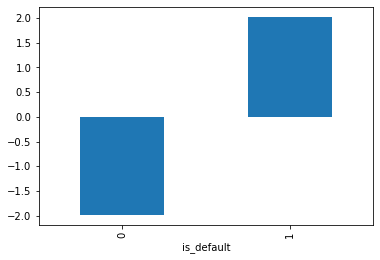

In [125]:
df_fe1.groupby('is_default')['payment_value'].mean().plot(kind='bar')

<AxesSubplot:>

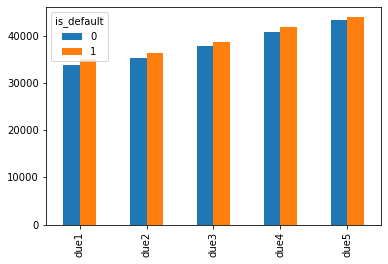

In [131]:
df_fe1.groupby('is_default')['due1','due2','due3','due4','due5'].mean().T.plot(kind='bar')

In [120]:
df_fe1['AGE'] = age_bin
df_fe1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,is_default,due1,due2,due3,due4,due5,payment_value
0,20000.0,2,2,1,21-30,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3102.0,-2
1,120000.0,2,2,2,21-30,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3261.0,2455.0,2272.0,1682.0,1725.0,3
2,90000.0,2,2,2,31-40,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,14549.0,13948.0,13331.0,12059.0,12509.0,0
3,50000.0,2,2,1,31-40,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,28478.0,27859.0,27114.0,47272.0,46233.0,0
4,50000.0,1,2,1,51-60,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18442.0,10146.0,10940.0,-846.0,3670.0,-2


#### Scaling

In [121]:
df_num = pd.concat([df.iloc[:,[0,4]],df.iloc[:,11:23]],axis=1)
df_cat = pd.concat([df.iloc[:,[1,2,3]],df.iloc[:,5:11]],axis=1)

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
SS = StandardScaler()
scale_data = SS.fit_transform(df_num)
df_scaled = pd.DataFrame(scale_data,columns=df_num.columns)
df_scaled.head()

,LIMIT_BAL,AGE,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


### Transformation

In [124]:
from sklearn.preprocessing import PowerTransformer

In [125]:
yeo_john = PowerTransformer(method='yeo-johnson')
df_trans = df[['LIMIT_BAL','AGE']]
df_trans['LIMIT_BAL'] = yeo_john.fit_transform(df_trans[['LIMIT_BAL']])
df_trans['AGE'] = yeo_john.fit_transform(df_trans[['AGE']])

# transformation has done on 'Limit_bal' and 'Age' to reduce the skewness in the variable and to get the distribution near normal

### Encoding

In [126]:
df_trans1 = df_num.copy()
for col in df_num.columns:
    df_trans1[col] = yeo_john.fit_transform(df_trans1[[col]])
df_trans1.skew()

LIMIT_BAL       -0.075402
AGE              0.035120
BILL_AMT1_SEP   -2.448036
BILL_AMT2_AUG   -1.310403
BILL_AMT3_JUL   -3.235929
BILL_AMT4_JUN   -2.821533
BILL_AMT5_MAY   -1.323215
BILL_AMT6_APR   -3.025677
PAY_AMT1_SEP    -0.133111
PAY_AMT2_AUG    -0.112972
PAY_AMT3_JUL    -0.151916
PAY_AMT4_JUN    -0.165690
PAY_AMT5_MAY    -0.178923
PAY_AMT6_APR    -0.175019
dtype: float64

In [127]:
df_cat = df_cat.astype('object')
df_cat.dtypes

SEX          object
EDUCATION    object
MARRIAGE     object
PAY_1_SEP    object
PAY_2_AUG    object
PAY_3_JUL    object
PAY_4_JUN    object
PAY_5_MAY    object
PAY_6_APR    object
dtype: object

In [128]:
enc_ct = pd.get_dummies(df_cat,drop_first=True)
enc_ct.head()

# encoding has done for the categorical variables

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_SEP_-1,PAY_1_SEP_0,PAY_1_SEP_1,PAY_1_SEP_2,PAY_1_SEP_3,PAY_1_SEP_4,PAY_1_SEP_5,PAY_1_SEP_6,PAY_1_SEP_7,PAY_1_SEP_8,PAY_2_AUG_-1,PAY_2_AUG_0,PAY_2_AUG_1,PAY_2_AUG_2,PAY_2_AUG_3,PAY_2_AUG_4,PAY_2_AUG_5,PAY_2_AUG_6,PAY_2_AUG_7,PAY_2_AUG_8,PAY_3_JUL_-1,PAY_3_JUL_0,PAY_3_JUL_1,PAY_3_JUL_2,PAY_3_JUL_3,PAY_3_JUL_4,PAY_3_JUL_5,PAY_3_JUL_6,PAY_3_JUL_7,PAY_3_JUL_8,PAY_4_JUN_-1,PAY_4_JUN_0,PAY_4_JUN_1,PAY_4_JUN_2,PAY_4_JUN_3,PAY_4_JUN_4,PAY_4_JUN_5,PAY_4_JUN_6,PAY_4_JUN_7,PAY_4_JUN_8,PAY_5_MAY_-1,PAY_5_MAY_0,PAY_5_MAY_2,PAY_5_MAY_3,PAY_5_MAY_4,PAY_5_MAY_5,PAY_5_MAY_6,PAY_5_MAY_7,PAY_5_MAY_8,PAY_6_APR_-1,PAY_6_APR_0,PAY_6_APR_2,PAY_6_APR_3,PAY_6_APR_4,PAY_6_APR_5,PAY_6_APR_6,PAY_6_APR_7,PAY_6_APR_8
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Statistical tests

In [129]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,is_default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [130]:
from scipy.stats import ttest_ind

In [131]:
df_num.head()

,LIMIT_BAL,AGE,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [233]:
sig_vars=[]
insig_vars=[]
for col in df_num.columns:
    sample1 = df[df['is_default']==0][col]
    sample2 = df[df['is_default']==1][col]
    test_stat,pval = ttest_ind(sample1,sample2)
    print('\n')
    if pval<=0.05:
        print('Significant variable',col,'pvalue:',round(pval,2))
        sig_vars.append(col)
    else:
        print('insignificant variable',col,'pvalue:',round(pval,2))
        insig_vars.append(col)

# if pvalue is less than 0.05 then the variable is significant otherwise insignificant 



Significant variable LIMIT_BAL pvalue: 0.0


Significant variable AGE pvalue: 0.02


Significant variable BILL_AMT1_SEP pvalue: 0.0


Significant variable BILL_AMT2_AUG pvalue: 0.01


Significant variable BILL_AMT3_JUL pvalue: 0.01


insignificant variable BILL_AMT4_JUN pvalue: 0.08


insignificant variable BILL_AMT5_MAY pvalue: 0.24


insignificant variable BILL_AMT6_APR pvalue: 0.35


Significant variable PAY_AMT1_SEP pvalue: 0.0


Significant variable PAY_AMT2_AUG pvalue: 0.0


Significant variable PAY_AMT3_JUL pvalue: 0.0


Significant variable PAY_AMT4_JUN pvalue: 0.0


Significant variable PAY_AMT5_MAY pvalue: 0.0


Significant variable PAY_AMT6_APR pvalue: 0.0


In [133]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR
0,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0


In [234]:
from scipy import stats

In [235]:
for col in df_cat.columns:
    ct = pd.crosstab(df['is_default'],df[col])
    test_stat,pval,dof,ex = stats.chi2_contingency(ct)
    print('\n')
    if pval<=0.05:
        print('Significant variable',col,'pvalue:',round(pval,2))
        sig_vars.append(col)
    else:
        print('insignificant variable',col,'pvalue:',round(pval,2))
        insig_vars.append(col)



Significant variable SEX pvalue: 0.0


Significant variable EDUCATION pvalue: 0.0


Significant variable MARRIAGE pvalue: 0.0


Significant variable PAY_1_SEP pvalue: 0.0


Significant variable PAY_2_AUG pvalue: 0.0


Significant variable PAY_3_JUL pvalue: 0.0


Significant variable PAY_4_JUN pvalue: 0.0


Significant variable PAY_5_MAY pvalue: 0.0


Significant variable PAY_6_APR pvalue: 0.0


In [236]:
print('Significant variables')
print(sig_vars,'\n')
print('Insignificant variables')
print(insig_vars)

# these are the significant variables and insignificant variable list got from statistical tests

Significant variables
['LIMIT_BAL', 'AGE', 'BILL_AMT1_SEP', 'BILL_AMT2_AUG', 'BILL_AMT3_JUL', 'PAY_AMT1_SEP', 'PAY_AMT2_AUG', 'PAY_AMT3_JUL', 'PAY_AMT4_JUN', 'PAY_AMT5_MAY', 'PAY_AMT6_APR', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1_SEP', 'PAY_2_AUG', 'PAY_3_JUL', 'PAY_4_JUN', 'PAY_5_MAY', 'PAY_6_APR'] 

Insignificant variables
['BILL_AMT4_JUN', 'BILL_AMT5_MAY', 'BILL_AMT6_APR']


#### Splitting the data (num-scaled)

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
XS = pd.concat([df_scaled,enc_ct],axis=1)
ys = df['is_default']

In [139]:
XS_train,XS_test,ys_train,ys_test = train_test_split(XS,ys,test_size=0.3,random_state=10)

print(XS_train.shape)
print(XS_test.shape)
print(ys_train.shape)
print(ys_test.shape)

(21000, 78)
(9000, 78)
(21000,)
(9000,)


### Base Model - Logistic Regression

In [140]:
# building logistic regression model as a base model with scaled numerical data and encoded categorical data

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,cohen_kappa_score,classification_report,confusion_matrix

In [142]:
LR1 = LogisticRegression()
LR1.fit(XS_train,ys_train)       
y_pred_LR1 = LR1.predict(XS_test)
roc_auc_LR1 = roc_auc_score(ys_test,y_pred_LR1)
accuracy_LR1 = accuracy_score(ys_test,y_pred_LR1)
kappa_score_LR1 = cohen_kappa_score(ys_test,y_pred_LR1)  
print('roc_auc:',round(roc_auc_LR1,2))
print('accuracy:',round(accuracy_LR1,2))
print('kappa_score:',round(kappa_score_LR1,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_LR1))

roc_auc: 0.65
accuracy: 0.82
kappa_score: 0.37
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      6982
           1       0.69      0.35      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [143]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [144]:
LR1_tuned = LogisticRegression(penalty='l2',C=0.1)
LR1_tuned.fit(XS_train,ys_train)       
y_pred_LR1_tuned = LR1_tuned.predict(XS_test)
roc_auc_LR1_tuned = roc_auc_score(ys_test,y_pred_LR1_tuned)
accuracy_LR1_tuned = accuracy_score(ys_test,y_pred_LR1_tuned)
kappa_score_LR1_tuned = cohen_kappa_score(ys_test,y_pred_LR1_tuned)  
print('roc_auc:',round(roc_auc_LR1_tuned,2))
print('accuracy:',round(accuracy_LR1_tuned,2))
print('kappa_score:',round(kappa_score_LR1_tuned,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_LR1_tuned))

roc_auc: 0.65
accuracy: 0.82
kappa_score: 0.37
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      6982
           1       0.70      0.35      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### SMOTE

In [145]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[4], random_state=0)
x_smote2, y_smote2 = smote_nc.fit_resample(df_fe1.drop('is_default',axis=1), df_fe1['is_default'])

print('Original dataset shape', len(df_fe1))
print('Resampled dataset shape', len(y_smote2))

Original dataset shape 30000
Resampled dataset shape 46728


In [146]:
columns = list(df_fe1.columns)
balance_df2 = pd.DataFrame(x_smote2, columns=columns)
balance_df2['is_default'] = y_smote2

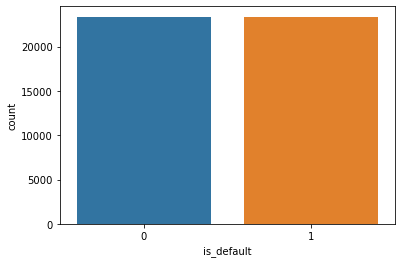

In [147]:
sns.countplot(balance_df2['is_default'])
plt.show()

In [148]:
balance_df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1_SEP,PAY_2_AUG,PAY_3_JUL,PAY_4_JUN,PAY_5_MAY,PAY_6_APR,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,is_default,due1,due2,due3,due4,due5,payment_value
0,20000.0,2,2,1,21-30,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3102.0,-2
1,120000.0,2,2,2,21-30,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3261.0,2455.0,2272.0,1682.0,1725.0,3
2,90000.0,2,2,2,31-40,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,14549.0,13948.0,13331.0,12059.0,12509.0,0
3,50000.0,2,2,1,31-40,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,28478.0,27859.0,27114.0,47272.0,46233.0,0
4,50000.0,1,2,1,51-60,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18442.0,10146.0,10940.0,-846.0,3670.0,-2


In [149]:
df_smote_cat2 = balance_df2.iloc[:,1:11]

In [150]:
df_smote_num2 = pd.concat([balance_df2.iloc[:,[0]],balance_df2.iloc[:,11:23]],axis=1)

In [151]:
for i in balance_df2.iloc[:,-5:].columns:
    df_smote_num2[i] = balance_df2[i]
df_smote_num2.head()

,LIMIT_BAL,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,due2,due3,due4,due5,payment_value
0,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3102.0,-2
1,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2455.0,2272.0,1682.0,1725.0,3
2,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,13948.0,13331.0,12059.0,12509.0,0
3,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,27859.0,27114.0,47272.0,46233.0,0
4,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,10146.0,10940.0,-846.0,3670.0,-2


In [152]:
df_smote_num2['payment_value'] = balance_df2['payment_value']

In [153]:
df_smote_cat2 = df_smote_cat2.astype('object')
df_smote_cat2.dtypes

SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_1_SEP    object
PAY_2_AUG    object
PAY_3_JUL    object
PAY_4_JUN    object
PAY_5_MAY    object
PAY_6_APR    object
dtype: object

In [154]:
enc_smote_ct2 = pd.get_dummies(df_smote_cat2,drop_first=True)
enc_smote_ct2.head()

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,AGE_31-40,AGE_41-50,AGE_51-60,AGE_61-70,AGE_71-80,PAY_1_SEP_-1,PAY_1_SEP_0,PAY_1_SEP_1,PAY_1_SEP_2,PAY_1_SEP_3,PAY_1_SEP_4,PAY_1_SEP_5,PAY_1_SEP_6,PAY_1_SEP_7,PAY_1_SEP_8,PAY_2_AUG_-1,PAY_2_AUG_0,PAY_2_AUG_1,PAY_2_AUG_2,PAY_2_AUG_3,PAY_2_AUG_4,PAY_2_AUG_5,PAY_2_AUG_6,PAY_2_AUG_7,PAY_2_AUG_8,PAY_3_JUL_-1,PAY_3_JUL_0,PAY_3_JUL_1,PAY_3_JUL_2,PAY_3_JUL_3,PAY_3_JUL_4,PAY_3_JUL_5,PAY_3_JUL_6,PAY_3_JUL_7,PAY_3_JUL_8,PAY_4_JUN_-1,PAY_4_JUN_0,PAY_4_JUN_1,PAY_4_JUN_2,PAY_4_JUN_3,PAY_4_JUN_4,PAY_4_JUN_5,PAY_4_JUN_6,PAY_4_JUN_7,PAY_4_JUN_8,PAY_5_MAY_-1,PAY_5_MAY_0,PAY_5_MAY_1,PAY_5_MAY_2,PAY_5_MAY_3,PAY_5_MAY_4,PAY_5_MAY_5,PAY_5_MAY_6,PAY_5_MAY_7,PAY_5_MAY_8,PAY_6_APR_-1,PAY_6_APR_0,PAY_6_APR_1,PAY_6_APR_2,PAY_6_APR_3,PAY_6_APR_4,PAY_6_APR_5,PAY_6_APR_6,PAY_6_APR_7,PAY_6_APR_8
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [155]:
SS = StandardScaler()
scale_data2 = SS.fit_transform(df_smote_num2)
df_scaled2 = pd.DataFrame(scale_data2,columns=df_smote_num2.columns)
df_scaled2.head()

,LIMIT_BAL,BILL_AMT1_SEP,BILL_AMT2_AUG,BILL_AMT3_JUL,BILL_AMT4_JUN,BILL_AMT5_MAY,BILL_AMT6_APR,PAY_AMT1_SEP,PAY_AMT2_AUG,PAY_AMT3_JUL,PAY_AMT4_JUN,PAY_AMT5_MAY,PAY_AMT6_APR,due2,due3,due4,due5,payment_value
0,-1.062451,-0.631896,-0.639524,-0.664383,-0.667563,-0.658641,-0.651712,-0.338523,-0.218426,-0.286220,-0.303005,-0.308244,-0.285223,-0.616070,-0.626386,-0.632260,-0.595011,-0.309998
1,-0.267280,-0.648751,-0.658963,-0.635353,-0.616422,-0.601762,-0.596860,-0.338523,-0.201998,-0.220765,-0.229141,-0.308244,-0.155259,-0.573947,-0.589265,-0.606619,-0.615199,0.475410
2,-0.505831,-0.285139,-0.485297,-0.476913,-0.443574,-0.412555,-0.390170,-0.229584,-0.175587,-0.220765,-0.229141,-0.232267,0.039688,-0.376750,-0.408580,-0.448430,-0.457096,0.004165
3,-0.823900,-0.042096,-0.002415,0.043575,-0.225024,-0.181895,-0.154716,-0.194993,-0.148173,-0.207674,-0.221755,-0.227024,-0.220241,-0.138065,-0.183388,0.088365,0.037327,0.004165
4,-0.823900,-0.567490,-0.603272,-0.152431,-0.340277,-0.343444,-0.329919,-0.194993,1.682729,0.368331,0.361768,-0.255896,-0.241100,-0.441985,-0.447645,-0.645156,-0.586684,-0.309998


In [156]:
Xs_smote = pd.concat([df_scaled2,enc_smote_ct2],axis=1)
ys_smote = balance_df2['is_default']

In [157]:
from sklearn.model_selection import train_test_split

Xs_train,Xs_test,ys_train,ys_test = train_test_split(Xs_smote,ys_smote,test_size=0.3,random_state=10)

print(Xs_train.shape)
print(Xs_test.shape)
print(ys_train.shape)
print(ys_test.shape)

(32709, 89)
(14019, 89)
(32709,)
(14019,)


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,cohen_kappa_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [159]:
LR = LogisticRegression()
LR.fit(Xs_train,ys_train)       
y_pred_LR = LR.predict(Xs_test)
roc_auc_LR = roc_auc_score(ys_test,y_pred_LR)
accuracy_LR = accuracy_score(ys_test,y_pred_LR)
kappa_score_LR = cohen_kappa_score(ys_test,y_pred_LR)  
print('roc_auc:',round(roc_auc_LR,2))
print('accuracy:',round(accuracy_LR,2))
print('kappa_score:',round(kappa_score_LR,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_LR))

roc_auc: 0.75
accuracy: 0.75
kappa_score: 0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      6966
           1       0.79      0.69      0.74      7053

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019



In [160]:
LR = LogisticRegression(penalty='l2',C=10)
LR.fit(Xs_train,ys_train)       
y_pred_lr = LR.predict(Xs_test)
roc_auc_lr = roc_auc_score(ys_test,y_pred_lr)
accuracy_lr = accuracy_score(ys_test,y_pred_lr)
kappa_score_lr = cohen_kappa_score(ys_test,y_pred_lr)  
print('roc_auc:',round(roc_auc_lr,2))
print('accuracy:',round(accuracy_lr,2))
print('kappa_score:',round(kappa_score_lr,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_lr))

roc_auc: 0.75
accuracy: 0.75
kappa_score: 0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      6966
           1       0.79      0.69      0.74      7053

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019



In [161]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=LR,X=Xs_smote,y=ys_smote,scoring='roc_auc',cv=kf,n_jobs=-1)
lr_BE = np.mean(1-score)
lr_VE = np.std(score)

print('BE:',round(lr_BE,3))
print('VE:',round(lr_VE,3))

BE: 0.174
VE: 0.005


### Naive Baye's

In [162]:
from sklearn.naive_bayes import GaussianNB

In [163]:
nb = GaussianNB()
nb.fit(Xs_train,ys_train)       
y_pred_nb = nb.predict(Xs_test)
roc_auc_nb = roc_auc_score(ys_test,y_pred_nb)
accuracy_nb = accuracy_score(ys_test,y_pred_nb)
kappa_score_nb = cohen_kappa_score(ys_test,y_pred_nb)  
print('roc_auc:',round(roc_auc_nb,2))
print('accuracy:',round(accuracy_nb,2))
print('kappa_score:',round(kappa_score_nb,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_nb))

roc_auc: 0.63
accuracy: 0.63
kappa_score: 0.26
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.98      0.72      6966
           1       0.94      0.28      0.43      7053

    accuracy                           0.63     14019
   macro avg       0.76      0.63      0.58     14019
weighted avg       0.76      0.63      0.58     14019



In [164]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=nb,X=Xs_smote,y=ys_smote,scoring='roc_auc',cv=kf,n_jobs=-1)
nb_BE = np.mean(1-score)
nb_VE = np.std(score)

print('BE:',round(nb_BE,3))
print('VE:',round(nb_VE,3))

BE: 0.243
VE: 0.005


### KNN

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn = KNeighborsClassifier()
knn.fit(Xs_train,ys_train)       
y_pred_knn = knn.predict(Xs_test)
roc_auc_knn = roc_auc_score(ys_test,y_pred_knn)
accuracy_knn = accuracy_score(ys_test,y_pred_knn)
kappa_score_knn = cohen_kappa_score(ys_test,y_pred_knn)  
print('roc_auc:',round(roc_auc_knn,2))
print('accuracy:',round(accuracy_knn,2))
print('kappa_score:',round(kappa_score_knn,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_knn))

roc_auc: 0.77
accuracy: 0.77
kappa_score: 0.55
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      6966
           1       0.77      0.78      0.78      7053

    accuracy                           0.77     14019
   macro avg       0.77      0.77      0.77     14019
weighted avg       0.77      0.77      0.77     14019



In [167]:
knn = KNeighborsClassifier(n_neighbors=12,weights='distance')
knn.fit(Xs_train,ys_train)       
y_pred_knn = knn.predict(Xs_test)
roc_auc_knn = roc_auc_score(ys_test,y_pred_knn)
accuracy_knn = accuracy_score(ys_test,y_pred_knn)
kappa_score_knn = cohen_kappa_score(ys_test,y_pred_knn)  
print('roc_auc:',round(roc_auc_knn,2))
print('accuracy:',round(accuracy_knn,2))
print('kappa_score:',round(kappa_score_knn,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_knn))

roc_auc: 0.79
accuracy: 0.79
kappa_score: 0.58
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      6966
           1       0.79      0.80      0.79      7053

    accuracy                           0.79     14019
   macro avg       0.79      0.79      0.79     14019
weighted avg       0.79      0.79      0.79     14019



In [168]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=knn,X=Xs_smote,y=ys_smote,scoring='roc_auc',cv=kf,n_jobs=-1)
knn_BE = np.mean(1-score)
knn_VE = np.std(score)

print('BE:',round(knn_BE,3))
print('VE:',round(knn_VE,3))

BE: 0.127
VE: 0.003


### Stochastic Gradient Descent

In [169]:
from sklearn.linear_model import SGDClassifier

In [170]:
SGD = SGDClassifier()
SGD.fit(Xs_train,ys_train)       
y_pred_sgd = SGD.predict(Xs_test)
roc_auc_sgd = roc_auc_score(ys_test,y_pred_sgd)
accuracy_sgd = accuracy_score(ys_test,y_pred_sgd)
kappa_score_sgd = cohen_kappa_score(ys_test,y_pred_sgd)  
print('roc_auc:',round(roc_auc_sgd,2))
print('accuracy:',round(accuracy_sgd,2))
print('kappa_score:',round(kappa_score_sgd,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_sgd))

roc_auc: 0.75
accuracy: 0.75
kappa_score: 0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      6966
           1       0.78      0.69      0.73      7053

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019



In [171]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=SGD,X=Xs_smote,y=ys_smote,scoring='roc_auc',cv=kf,n_jobs=-1)
sgd_BE = np.mean(1-score)
sgd_VE = np.std(score)

print('BE:',round(sgd_BE,3))
print('VE:',round(sgd_VE,3))

BE: 0.179
VE: 0.004


### Support Vector Machine

In [172]:
from sklearn.svm import SVC

In [173]:
SVM = SVC()
SVM.fit(Xs_train,ys_train)       
y_pred_svm = SVM.predict(Xs_test)
roc_auc_svm = roc_auc_score(ys_test,y_pred_svm)
accuracy_svm = accuracy_score(ys_test,y_pred_svm)
kappa_score_svm = cohen_kappa_score(ys_test,y_pred_svm)  
print('roc_auc:',round(roc_auc_svm,2))
print('accuracy:',round(accuracy_svm,2))
print('kappa_score:',round(kappa_score_svm,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_svm))

roc_auc: 0.79
accuracy: 0.79
kappa_score: 0.57
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80      6966
           1       0.84      0.71      0.77      7053

    accuracy                           0.79     14019
   macro avg       0.79      0.79      0.78     14019
weighted avg       0.79      0.79      0.78     14019



In [174]:
SVM = SVC(C=10,kernel='rbf')
SVM.fit(Xs_train,ys_train)       
y_pred_svm = SVM.predict(Xs_test)
roc_auc_svm = roc_auc_score(ys_test,y_pred_svm)
accuracy_svm = accuracy_score(ys_test,y_pred_svm)
kappa_score_svm = cohen_kappa_score(ys_test,y_pred_svm)  
print('roc_auc:',round(roc_auc_svm,2))
print('accuracy:',round(accuracy_svm,2))
print('kappa_score:',round(kappa_score_svm,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_svm))

roc_auc: 0.8
accuracy: 0.8
kappa_score: 0.6
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      6966
           1       0.84      0.74      0.79      7053

    accuracy                           0.80     14019
   macro avg       0.81      0.80      0.80     14019
weighted avg       0.81      0.80      0.80     14019



In [175]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=SVM,X=Xs_smote,y=ys_smote,scoring='roc_auc',cv=kf,n_jobs=-1)
svm_BE = np.mean(1-score)
svm_VE = np.std(score)

print('BE:',round(svm_BE,3))
print('VE:',round(svm_VE,3))

BE: 0.121
VE: 0.002


#### Data without feature scaling

In [176]:
X3 = pd.concat([df_smote_num2,enc_smote_ct2],axis=1)
y3 = balance_df2['is_default']

In [177]:
from sklearn.model_selection import train_test_split

X_train4,X_test4,y_train4,y_test4 = train_test_split(X3,y3,test_size=0.3,random_state=10)

print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(32709, 89)
(14019, 89)
(32709,)
(14019,)


### DecisionTree

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
DT = DecisionTreeClassifier()
DT.fit(X_train4,y_train4)            
y_pred_dt = DT.predict(X_test4)
roc_auc_dt = roc_auc_score(y_test4,y_pred_dt)
accuracy_dt = accuracy_score(y_test4,y_pred_dt)
kappa_score_dt = cohen_kappa_score(y_test4,y_pred_dt)   
print('roc_auc:',round(roc_auc_dt,2))
print('accuracy:',round(accuracy_dt,2))
print('kappa_score:',round(kappa_score_dt,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_dt))

roc_auc: 0.76
accuracy: 0.76
kappa_score: 0.51
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      6966
           1       0.75      0.78      0.76      7053

    accuracy                           0.76     14019
   macro avg       0.76      0.76      0.76     14019
weighted avg       0.76      0.76      0.76     14019



In [180]:
params = {'max_depth': list(range(10,101,10)), 'min_samples_split':[0.1,0.2,0.4,1,2]}
kf = KFold(n_splits=5,shuffle=True,random_state=10)
gs=GridSearchCV(DT,params,cv=kf,scoring='roc_auc',n_jobs=-1,verbose=3) 
gs.fit(X_train4,y_train4)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'min_samples_split': [0.1, 0.2, 0.4, 1, 2]},
             scoring='roc_auc', verbose=3)

In [181]:
gs.best_params_

{'max_depth': 10, 'min_samples_split': 2}

In [185]:
DT = DecisionTreeClassifier(max_depth=10,min_samples_split=2)
DT.fit(X_train4,y_train4)            
y_pred_dt = DT.predict(X_test4)
roc_auc_dt = roc_auc_score(y_test4,y_pred_dt)
accuracy_dt = accuracy_score(y_test4,y_pred_dt)
kappa_score_dt = cohen_kappa_score(y_test4,y_pred_dt)
print('roc_auc:',round(roc_auc_dt,2))
print('accuracy:',round(accuracy_dt,2))
print('kappa_score:',round(kappa_score_dt,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_dt))

roc_auc: 0.77
accuracy: 0.77
kappa_score: 0.53
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      6966
           1       0.79      0.73      0.76      7053

    accuracy                           0.77     14019
   macro avg       0.77      0.77      0.77     14019
weighted avg       0.77      0.77      0.76     14019



In [191]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=DT,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
dt_BE = np.mean(1-score)
dt_VE = np.std(score)

print('BE:',round(dt_BE,3))
print('VE:',round(dt_VE,3))

BE: 0.163
VE: 0.003


### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
RF4 = RandomForestClassifier()
RF4.fit(X_train4,y_train4)            
y_pred_rf4 = RF4.predict(X_test4)
roc_auc_rf4 = roc_auc_score(y_test4,y_pred_rf4)
accuracy_rf4 = accuracy_score(y_test4,y_pred_rf4)
kappa_score_rf4 = cohen_kappa_score(y_test4,y_pred_rf4)
print('roc_auc:',round(roc_auc_rf4,2))
print('accuracy:',round(accuracy_rf4,2))
print('kappa_score:',round(kappa_score_rf4,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_rf4))

roc_auc: 0.85
accuracy: 0.85
kappa_score: 0.69
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      6966
           1       0.87      0.82      0.84      7053

    accuracy                           0.85     14019
   macro avg       0.85      0.85      0.85     14019
weighted avg       0.85      0.85      0.85     14019



In [192]:
params = {'n_estimators': [100,150,200,250,300], 'max_depth': list(range(10,51,10))}
kf = KFold(n_splits=5,shuffle=True,random_state=10)
gs = GridSearchCV(RF4,params,cv=kf,scoring='roc_auc',n_jobs=-1,verbose=3) 
gs.fit(X_train4,y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='roc_auc', verbose=3)

In [193]:
gs.best_score_

0.9144187398911168

In [195]:
gs.best_params_

{'max_depth': 30, 'n_estimators': 300}

In [196]:
RF4 = RandomForestClassifier(n_estimators=300,max_depth=30)
RF4.fit(X_train4,y_train4)            
y_pred_rf4 = RF4.predict(X_test4)
roc_auc_rf4 = roc_auc_score(y_test4,y_pred_rf4)
accuracy_rf4 = accuracy_score(y_test4,y_pred_rf4)
kappa_score_rf4 = cohen_kappa_score(y_test4,y_pred_rf4)  
print('roc_auc:',round(roc_auc_rf4,2))
print('accuracy:',round(accuracy_rf4,2))
print('kappa_score:',round(kappa_score_rf4,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_rf4))

roc_auc: 0.85
accuracy: 0.85
kappa_score: 0.7
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      6966
           1       0.87      0.83      0.85      7053

    accuracy                           0.85     14019
   macro avg       0.85      0.85      0.85     14019
weighted avg       0.85      0.85      0.85     14019



In [202]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=RF4,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
rf_BE = np.mean(1-score)
rf_VE = np.std(score)

print('BE:',round(rf_BE,3))
print('VE:',round(rf_VE,3))

BE: 0.074
VE: 0.003


### XGBoost

In [204]:
from xgboost import XGBClassifier

In [205]:
XGB = XGBClassifier()
XGB.fit(X_train4,y_train4)            
y_pred_xgb = XGB.predict(X_test4)
roc_auc_xgb = roc_auc_score(y_test4,y_pred_xgb)
accuracy_xgb = accuracy_score(y_test4,y_pred_xgb)
kappa_score_xgb = cohen_kappa_score(y_test4,y_pred_xgb)

print('roc_auc:',round(roc_auc_xgb,2))
print('accuracy:',round(accuracy_xgb,2))
print('kappa_score:',round(kappa_score_xgb,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_xgb))

roc_auc: 0.83
accuracy: 0.83
kappa_score: 0.66
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      6966
           1       0.85      0.80      0.83      7053

    accuracy                           0.83     14019
   macro avg       0.83      0.83      0.83     14019
weighted avg       0.83      0.83      0.83     14019



In [206]:
params = {'n_estimators': [100,150,200,250,300], 'max_depth': list(range(10,51,10))}
kf = KFold(n_splits=5,shuffle=True,random_state=0)
gs=GridSearchCV(XGB,params,cv=kf,scoring='roc_auc',n_jobs=-1,verbose=3) 
gs.fit(X_train4,y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='roc_auc', verbose=3)

In [207]:
gs.best_score_

0.9209949576826147

In [208]:
gs.best_params_

{'max_depth': 20, 'n_estimators': 300}

In [209]:
XGB = XGBClassifier(n_estimators=300,max_depth=20)
XGB.fit(X_train4,y_train4)            
y_pred_xgb = XGB.predict(X_test4)
roc_auc_xgb = roc_auc_score(y_test4,y_pred_xgb)
accuracy_xgb = accuracy_score(y_test4,y_pred_xgb)
kappa_score_xgb = cohen_kappa_score(y_test4,y_pred_xgb)  

print('roc_auc:',round(roc_auc_xgb,2))
print('accuracy:',round(accuracy_xgb,2))
print('kappa_score:',round(kappa_score_xgb,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_xgb))

roc_auc: 0.86
accuracy: 0.86
kappa_score: 0.71
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      6966
           1       0.87      0.84      0.86      7053

    accuracy                           0.86     14019
   macro avg       0.86      0.86      0.86     14019
weighted avg       0.86      0.86      0.86     14019



In [210]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=XGB,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
xgb_BE = np.mean(1-score)
xgb_VE = np.std(score)

print('BE:',round(rf_BE,3))
print('VE:',round(rf_VE,3))

BE: 0.074
VE: 0.003


### Gradient Boost

In [211]:
from sklearn.ensemble import GradientBoostingClassifier

In [212]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train4,y_train4)       
y_pred_gbc = GBC.predict(X_test4)
roc_auc_gbc = roc_auc_score(y_test4,y_pred_gbc)
accuracy_gbc = accuracy_score(y_test4,y_pred_gbc)
kappa_score_gbc = cohen_kappa_score(y_test4,y_pred_gbc)  
print('roc_auc:',round(roc_auc_gbc,2))
print('accuracy:',round(accuracy_gbc,2))
print('kappa_score:',round(kappa_score_gbc,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_gbc))

roc_auc: 0.79
accuracy: 0.79
kappa_score: 0.57
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      6966
           1       0.81      0.75      0.78      7053

    accuracy                           0.79     14019
   macro avg       0.79      0.79      0.79     14019
weighted avg       0.79      0.79      0.79     14019



In [214]:
params = {'n_estimators': [100,150,200,250], 'max_depth': list(range(1,11))}
kf = KFold(n_splits=5,shuffle=True,random_state=0)
gs=GridSearchCV(GBC,params,cv=kf,scoring='roc_auc',n_jobs=-1,verbose=3) 
gs.fit(X_train4,y_train4)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='roc_auc', verbose=3)

In [215]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 250}

In [216]:
GBC = GradientBoostingClassifier(n_estimators=250,max_depth=10)
GBC.fit(X_train4,y_train4)       
y_pred_gbc = GBC.predict(X_test4)
roc_auc_gbc = roc_auc_score(y_test4,y_pred_gbc)
accuracy_gbc = accuracy_score(y_test4,y_pred_gbc)
kappa_score_gbc = cohen_kappa_score(y_test4,y_pred_gbc)  
print('roc_auc:',round(roc_auc_gbc,2))
print('accuracy:',round(accuracy_gbc,2))
print('kappa_score:',round(kappa_score_gbc,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_gbc))

roc_auc: 0.85
accuracy: 0.85
kappa_score: 0.71
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      6966
           1       0.87      0.83      0.85      7053

    accuracy                           0.85     14019
   macro avg       0.85      0.85      0.85     14019
weighted avg       0.85      0.85      0.85     14019



In [224]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=GBC,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
gbc_BE = np.mean(1-score)
gbc_VE = np.std(score)

print('BE:',round(gbc_BE,3))
print('VE:',round(gbc_VE,3))

BE: 0.074
VE: 0.001


### LightGBM

In [225]:
from lightgbm import LGBMClassifier

In [226]:
lgb = LGBMClassifier()
lgb.fit(X_train4,y_train4)     
y_pred_lgb = lgb.predict(X_test4)
roc_auc_lgb = roc_auc_score(y_test4,y_pred_lgb)
accuracy_lgb = accuracy_score(y_test4,y_pred_lgb)
kappa_score_lgb = cohen_kappa_score(y_test4,y_pred_lgb)

print('roc_auc:',round(roc_auc_lgb,2))
print('accuracy:',round(accuracy_lgb,2))
print('kappa_score:',round(kappa_score_lgb,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_lgb))

roc_auc: 0.82
accuracy: 0.82
kappa_score: 0.64
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      6966
           1       0.86      0.77      0.81      7053

    accuracy                           0.82     14019
   macro avg       0.82      0.82      0.82     14019
weighted avg       0.82      0.82      0.82     14019



In [227]:
params = {'n_estimators': [100,150,200,250],'learning_rate':[0.5,0.1,0.2]}
kf = KFold(n_splits=5,shuffle=True,random_state=0)
gs=GridSearchCV(lgb,params,cv=kf,scoring='roc_auc',n_jobs=-1,verbose=3) 
gs.fit(X_train4,y_train4)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.2],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='roc_auc', verbose=3)

In [228]:
gs.best_params_

{'learning_rate': 0.2, 'n_estimators': 250}

In [229]:
lgb = LGBMClassifier(n_estimators=250,learning_rate=0.2)
lgb.fit(X_train4,y_train4)     
y_pred_lgb = lgb.predict(X_test4)
roc_auc_lgb = roc_auc_score(y_test4,y_pred_lgb)
accuracy_lgb = accuracy_score(y_test4,y_pred_lgb)
kappa_score_lgb = cohen_kappa_score(y_test4,y_pred_lgb)  

print('roc_auc:',round(roc_auc_lgb,2))
print('accuracy:',round(accuracy_lgb,2))
print('kappa_score:',round(kappa_score_lgb,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_lgb))

roc_auc: 0.84
accuracy: 0.84
kappa_score: 0.68
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      6966
           1       0.86      0.81      0.84      7053

    accuracy                           0.84     14019
   macro avg       0.84      0.84      0.84     14019
weighted avg       0.84      0.84      0.84     14019



In [230]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=lgb,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
lgb_BE = np.mean(1-score)
lgb_VE = np.std(score)

print('BE:',round(lgb_BE,3))
print('VE:',round(lgb_VE,3))

BE: 0.083
VE: 0.002


### CatBoostClassifier

In [231]:
from catboost import CatBoostClassifier

In [232]:
CBC = CatBoostClassifier()
CBC.fit(X_train4,y_train4)     
y_pred_cbc = CBC.predict(X_test4)
roc_auc_cbc = roc_auc_score(y_test4,y_pred_cbc)
accuracy_cbc = accuracy_score(y_test4,y_pred_cbc)
kappa_score_cbc = cohen_kappa_score(y_test4,y_pred_cbc)  

print('roc_auc:',round(roc_auc_cbc,2))
print('accuracy:',round(accuracy_cbc,2))
print('kappa_score:',round(kappa_score_cbc,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_cbc))

Learning rate set to 0.045677
0:	learn: 0.6761883	total: 169ms	remaining: 2m 48s
1:	learn: 0.6613511	total: 182ms	remaining: 1m 30s
2:	learn: 0.6468525	total: 195ms	remaining: 1m 4s
3:	learn: 0.6362843	total: 208ms	remaining: 51.7s
4:	learn: 0.6254824	total: 222ms	remaining: 44.3s
5:	learn: 0.6137385	total: 235ms	remaining: 38.9s
6:	learn: 0.6056203	total: 247ms	remaining: 35s
7:	learn: 0.5979271	total: 259ms	remaining: 32.2s
8:	learn: 0.5918765	total: 271ms	remaining: 29.8s
9:	learn: 0.5845112	total: 282ms	remaining: 27.9s
10:	learn: 0.5776926	total: 293ms	remaining: 26.4s
11:	learn: 0.5717993	total: 306ms	remaining: 25.2s
12:	learn: 0.5675832	total: 317ms	remaining: 24.1s
13:	learn: 0.5619090	total: 328ms	remaining: 23.1s
14:	learn: 0.5571158	total: 339ms	remaining: 22.3s
15:	learn: 0.5526372	total: 351ms	remaining: 21.6s
16:	learn: 0.5479100	total: 362ms	remaining: 20.9s
17:	learn: 0.5437378	total: 375ms	remaining: 20.4s
18:	learn: 0.5398631	total: 387ms	remaining: 20s
19:	learn: 0.

173:	learn: 0.4299641	total: 2.13s	remaining: 10.1s
174:	learn: 0.4297776	total: 2.14s	remaining: 10.1s
175:	learn: 0.4294873	total: 2.15s	remaining: 10.1s
176:	learn: 0.4292702	total: 2.16s	remaining: 10.1s
177:	learn: 0.4290599	total: 2.17s	remaining: 10s
178:	learn: 0.4287492	total: 2.19s	remaining: 10s
179:	learn: 0.4285827	total: 2.19s	remaining: 10s
180:	learn: 0.4283063	total: 2.2s	remaining: 9.98s
181:	learn: 0.4281290	total: 2.21s	remaining: 9.95s
182:	learn: 0.4276673	total: 2.22s	remaining: 9.93s
183:	learn: 0.4275584	total: 2.23s	remaining: 9.9s
184:	learn: 0.4274037	total: 2.24s	remaining: 9.89s
185:	learn: 0.4271992	total: 2.25s	remaining: 9.86s
186:	learn: 0.4269931	total: 2.27s	remaining: 9.85s
187:	learn: 0.4266919	total: 2.28s	remaining: 9.83s
188:	learn: 0.4264821	total: 2.29s	remaining: 9.81s
189:	learn: 0.4260944	total: 2.3s	remaining: 9.79s
190:	learn: 0.4259616	total: 2.31s	remaining: 9.78s
191:	learn: 0.4258048	total: 2.32s	remaining: 9.76s
192:	learn: 0.4255871

338:	learn: 0.3938757	total: 3.9s	remaining: 7.62s
339:	learn: 0.3937344	total: 3.92s	remaining: 7.6s
340:	learn: 0.3935914	total: 3.93s	remaining: 7.59s
341:	learn: 0.3933941	total: 3.94s	remaining: 7.58s
342:	learn: 0.3932994	total: 3.95s	remaining: 7.56s
343:	learn: 0.3931750	total: 3.96s	remaining: 7.55s
344:	learn: 0.3929444	total: 3.97s	remaining: 7.54s
345:	learn: 0.3927597	total: 3.98s	remaining: 7.52s
346:	learn: 0.3925128	total: 3.99s	remaining: 7.5s
347:	learn: 0.3923391	total: 4s	remaining: 7.49s
348:	learn: 0.3921887	total: 4.01s	remaining: 7.47s
349:	learn: 0.3920849	total: 4.01s	remaining: 7.46s
350:	learn: 0.3919597	total: 4.03s	remaining: 7.44s
351:	learn: 0.3917523	total: 4.03s	remaining: 7.43s
352:	learn: 0.3915166	total: 4.04s	remaining: 7.41s
353:	learn: 0.3913065	total: 4.05s	remaining: 7.4s
354:	learn: 0.3911448	total: 4.06s	remaining: 7.38s
355:	learn: 0.3909924	total: 4.07s	remaining: 7.37s
356:	learn: 0.3907709	total: 4.08s	remaining: 7.35s
357:	learn: 0.39039

505:	learn: 0.3671607	total: 5.69s	remaining: 5.56s
506:	learn: 0.3670151	total: 5.7s	remaining: 5.55s
507:	learn: 0.3669264	total: 5.71s	remaining: 5.53s
508:	learn: 0.3668104	total: 5.73s	remaining: 5.52s
509:	learn: 0.3666525	total: 5.74s	remaining: 5.51s
510:	learn: 0.3665636	total: 5.75s	remaining: 5.5s
511:	learn: 0.3663641	total: 5.76s	remaining: 5.49s
512:	learn: 0.3662634	total: 5.77s	remaining: 5.48s
513:	learn: 0.3661428	total: 5.78s	remaining: 5.47s
514:	learn: 0.3659908	total: 5.79s	remaining: 5.46s
515:	learn: 0.3659758	total: 5.8s	remaining: 5.44s
516:	learn: 0.3658388	total: 5.82s	remaining: 5.43s
517:	learn: 0.3657071	total: 5.83s	remaining: 5.42s
518:	learn: 0.3656120	total: 5.84s	remaining: 5.41s
519:	learn: 0.3653845	total: 5.85s	remaining: 5.4s
520:	learn: 0.3652576	total: 5.86s	remaining: 5.39s
521:	learn: 0.3651479	total: 5.87s	remaining: 5.37s
522:	learn: 0.3650693	total: 5.88s	remaining: 5.36s
523:	learn: 0.3648832	total: 5.89s	remaining: 5.35s
524:	learn: 0.36

668:	learn: 0.3481857	total: 7.47s	remaining: 3.7s
669:	learn: 0.3480731	total: 7.48s	remaining: 3.69s
670:	learn: 0.3479479	total: 7.5s	remaining: 3.68s
671:	learn: 0.3478086	total: 7.51s	remaining: 3.67s
672:	learn: 0.3477250	total: 7.52s	remaining: 3.65s
673:	learn: 0.3475732	total: 7.53s	remaining: 3.64s
674:	learn: 0.3474500	total: 7.54s	remaining: 3.63s
675:	learn: 0.3473706	total: 7.55s	remaining: 3.62s
676:	learn: 0.3472821	total: 7.57s	remaining: 3.61s
677:	learn: 0.3471326	total: 7.58s	remaining: 3.6s
678:	learn: 0.3470724	total: 7.59s	remaining: 3.59s
679:	learn: 0.3469463	total: 7.6s	remaining: 3.58s
680:	learn: 0.3468372	total: 7.61s	remaining: 3.57s
681:	learn: 0.3467378	total: 7.62s	remaining: 3.55s
682:	learn: 0.3465887	total: 7.64s	remaining: 3.55s
683:	learn: 0.3464702	total: 7.65s	remaining: 3.54s
684:	learn: 0.3463708	total: 7.67s	remaining: 3.52s
685:	learn: 0.3462388	total: 7.68s	remaining: 3.52s
686:	learn: 0.3461541	total: 7.69s	remaining: 3.5s
687:	learn: 0.346

838:	learn: 0.3311318	total: 9.43s	remaining: 1.81s
839:	learn: 0.3310085	total: 9.44s	remaining: 1.8s
840:	learn: 0.3309304	total: 9.46s	remaining: 1.79s
841:	learn: 0.3308322	total: 9.47s	remaining: 1.78s
842:	learn: 0.3307237	total: 9.48s	remaining: 1.77s
843:	learn: 0.3306187	total: 9.5s	remaining: 1.75s
844:	learn: 0.3305377	total: 9.51s	remaining: 1.74s
845:	learn: 0.3304424	total: 9.52s	remaining: 1.73s
846:	learn: 0.3303177	total: 9.54s	remaining: 1.72s
847:	learn: 0.3302272	total: 9.55s	remaining: 1.71s
848:	learn: 0.3301260	total: 9.56s	remaining: 1.7s
849:	learn: 0.3300134	total: 9.57s	remaining: 1.69s
850:	learn: 0.3299631	total: 9.58s	remaining: 1.68s
851:	learn: 0.3298937	total: 9.6s	remaining: 1.67s
852:	learn: 0.3298124	total: 9.62s	remaining: 1.66s
853:	learn: 0.3297563	total: 9.63s	remaining: 1.65s
854:	learn: 0.3296536	total: 9.64s	remaining: 1.64s
855:	learn: 0.3295848	total: 9.65s	remaining: 1.62s
856:	learn: 0.3295313	total: 9.67s	remaining: 1.61s
857:	learn: 0.32

In [259]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=CBC,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
cbc_BE = np.mean(1-score)
cbc_VE = np.std(score)

print('BE:',round(vc_BE,3))
print('VE:',round(vc_VE,3))

BE: 0.066
VE: 0.002


In [237]:
from sklearn.ensemble import AdaBoostClassifier

### Bagged LR:

In [239]:
from sklearn.ensemble import BaggingClassifier

In [256]:
BagLR=BaggingClassifier(base_estimator=LR,n_estimators=20,random_state=0)
BagLR.fit(Xs_train,ys_train)       
y_pred_bglr = BagLR.predict(Xs_test)
roc_auc_bglr = roc_auc_score(ys_test,y_pred_bglr)
accuracy_bglr = accuracy_score(ys_test,y_pred_bglr)
kappa_score_bglr = cohen_kappa_score(ys_test,y_pred_bglr)  
print('roc_auc:',round(roc_auc_bglr,2))
print('accuracy:',round(accuracy_bglr,2))
print('kappa_score:',round(kappa_score_bglr,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_bglr))

roc_auc: 0.75
accuracy: 0.75
kappa_score: 0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.81      0.77      6966
           1       0.79      0.69      0.74      7053

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019



### Boosted LR

In [243]:
BstLR=AdaBoostClassifier(base_estimator=LR)
BstLR.fit(Xs_train,ys_train)       
y_pred_blr = BstLR.predict(Xs_test)
roc_auc_blr = roc_auc_score(ys_test,y_pred_blr)
accuracy_blr = accuracy_score(ys_test,y_pred_blr)
kappa_score_blr = cohen_kappa_score(ys_test,y_pred_blr)  
print('roc_auc:',round(roc_auc_blr,2))
print('accuracy:',round(accuracy_blr,2))
print('kappa_score:',round(kappa_score_blr,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_blr))

roc_auc: 0.75
accuracy: 0.75
kappa_score: 0.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      6966
           1       0.78      0.69      0.74      7053

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019



### Naive Bayes bagging

In [244]:
bagnb = BaggingClassifier(base_estimator=nb,n_estimators=20)
bagnb.fit(Xs_train,ys_train)       
y_pred_bnb = bagnb.predict(Xs_test)
roc_auc_bnb = roc_auc_score(ys_test,y_pred_bnb)
accuracy_bnb = accuracy_score(ys_test,y_pred_bnb)
kappa_score_bnb = cohen_kappa_score(ys_test,y_pred_bnb)  
print('roc_auc:',round(roc_auc_bnb,2)) 
print('accuracy:',round(accuracy_bnb,2))
print('kappa_score:',round(kappa_score_bnb,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_bnb))

roc_auc: 0.63
accuracy: 0.63
kappa_score: 0.26
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.98      0.72      6966
           1       0.94      0.28      0.43      7053

    accuracy                           0.63     14019
   macro avg       0.76      0.63      0.58     14019
weighted avg       0.76      0.63      0.58     14019



### Boosted NB

In [258]:
bstnb = AdaBoostClassifier(base_estimator=nb)
bstnb.fit(Xs_train,ys_train)       
y_pred_bsnb = bstnb.predict(Xs_test)
roc_auc_bsnb = roc_auc_score(ys_test,y_pred_bsnb)
accuracy_bsnb = accuracy_score(ys_test,y_pred_bsnb)
kappa_score_bsnb = cohen_kappa_score(ys_test,y_pred_bsnb)  
print('roc_auc:',round(roc_auc_bsnb,2))
print('accuracy:',round(accuracy_bsnb,2))
print('kappa_score:',round(kappa_score_bsnb,2))
print('Classification Report:','\n',classification_report(ys_test,y_pred_bsnb))

roc_auc: 0.55
accuracy: 0.55
kappa_score: 0.1
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.99      0.68      6966
           1       0.89      0.11      0.20      7053

    accuracy                           0.55     14019
   macro avg       0.71      0.55      0.44     14019
weighted avg       0.71      0.55      0.44     14019



### DTBoost

In [246]:
DTB = AdaBoostClassifier(DT)
DTB.fit(X_train4,y_train4)            
y_pred_dtb = DTB.predict(X_test4)
roc_auc_dtb = roc_auc_score(y_test4,y_pred_dtb)
accuracy_dtb = accuracy_score(y_test4,y_pred_dtb)
kappa_score_dtb = cohen_kappa_score(y_test4,y_pred_dtb)
print('roc_auc:',round(roc_auc_dtb,2))  
print('accuracy:',round(accuracy_dtb,2))
print('kappa_score:',round(kappa_score_dtb,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_dtb))

roc_auc: 0.8
accuracy: 0.8
kappa_score: 0.6
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      6966
           1       0.80      0.79      0.80      7053

    accuracy                           0.80     14019
   macro avg       0.80      0.80      0.80     14019
weighted avg       0.80      0.80      0.80     14019



In [247]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=DTB,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
dt_BE = np.mean(1-score)
dt_VE = np.std(score)

print('BE:',round(dt_BE,3))
print('VE:',round(dt_VE,3))

BE: 0.132
VE: 0.005


In [252]:
from sklearn.ensemble import VotingClassifier
Stacked = VotingClassifier(estimators = [('RF',RF4),
                                         ('CATBoost', GBC), 
                                         ('XGBoost',XGB)],voting='soft')

In [253]:
Stacked.fit(X_train4,y_train4)     
y_pred_st = Stacked.predict(X_test4)
roc_auc_st = roc_auc_score(y_test4,y_pred_st)
accuracy_st = accuracy_score(y_test4,y_pred_st)
kappa_score_st = cohen_kappa_score(y_test4,y_pred_st) 

print('roc_auc:',round(roc_auc_st,2))  
print('accuracy:',round(accuracy_st,2))
print('kappa_score:',round(kappa_score_st,2))
print('Classification Report:','\n',classification_report(y_test4,y_pred_st))

roc_auc: 0.86
accuracy: 0.86
kappa_score: 0.72
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      6966
           1       0.88      0.84      0.86      7053

    accuracy                           0.86     14019
   macro avg       0.86      0.86      0.86     14019
weighted avg       0.86      0.86      0.86     14019



In [255]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
score = cross_val_score(estimator=Stacked,X=X3,y=y3,scoring='roc_auc',cv=kf,n_jobs=-1)
vc_BE = np.mean(1-score)
vc_VE = np.std(score)

print('BE:',round(vc_BE,3))
print('VE:',round(vc_VE,3))

BE: 0.066
VE: 0.002


In [265]:
be = []
ve = []
for i in [lr_BE,nb_BE,knn_BE,sgd_BE,svm_BE,dt_BE,rf_BE,xgb_BE,gbc_BE,lgb_BE,cbc_BE,vc_BE]:
    be.append(round(i,3))
for i in [lr_VE,nb_VE,knn_VE,sgd_VE,svm_VE,dt_VE,rf_VE,xgb_VE,gbc_VE,lgb_VE,cbc_VE,vc_VE]:
    ve.append(round(i,3))

In [266]:
print(be)
print(ve)

[0.174, 0.243, 0.127, 0.179, 0.121, 0.132, 0.074, 0.068, 0.074, 0.083, 0.089, 0.066]
[0.005, 0.005, 0.003, 0.004, 0.002, 0.005, 0.003, 0.002, 0.001, 0.002, 0.002, 0.002]


In [267]:
from sklearn.metrics import f1_score

In [ ]:
[y_pred_lr,y_pred_nb,y_pred_knn,y_pred_sgd,y_pred_svm]
[y_pred_dtb,y_pred_rf4,y_pred_xgb,y_pred_gbc,y_pred_lgb,y_pred_cbc,y_pred_st]



In [273]:
roc_auc = []
accuracy = []

for i in [y_pred_lr,y_pred_nb,y_pred_knn,y_pred_sgd,y_pred_svm]:
    roc_auc.append(roc_auc_score(ys_test,i))
    accuracy.append(accuracy_score(ys_test,i))

In [274]:
for i in [y_pred_dtb,y_pred_rf4,y_pred_xgb,y_pred_gbc,y_pred_lgb,y_pred_cbc,y_pred_st]:
    roc_auc.append(roc_auc_score(y_test4,i))
    accuracy.append(accuracy_score(y_test4,i))

In [282]:
df_metrics = pd.DataFrame(columns=['roc_auc','accuracy','Bias_error','Variance_error'])
df_metrics['roc_auc'] = roc_auc
df_metrics['accuracy'] = accuracy
df_metrics['Bias_error'] = be
df_metrics['Variance_error'] = ve

In [284]:
df_metrics['Model'] = ['Log Reg','Naive Bayes','Knn','Stochastic GD','Support Vector Machine','DTBoost','Random forest','XGBoost','GradientBoost','light gradient boost','Catboost','votingclassifier']


In [285]:
df_metrics = df_metrics[['Model','roc_auc','accuracy','Bias_error','Variance_error']]
df_metrics

,Model,roc_auc,accuracy,Bias_error,Variance_error
0,Log Reg,0.751216,0.750838,0.174,0.005
1,Naive Bayes,0.630185,0.628005,0.243,0.005
2,Knn,0.788736,0.788787,0.127,0.003
3,Stochastic GD,0.748186,0.747842,0.179,0.004
4,Support Vector Machine,0.801500,0.801127,0.121,0.002
5,DTBoost,0.798015,0.797988,0.132,0.005
6,Random forest,0.848128,0.847992,0.074,0.003
7,XGBoost,0.856650,0.856552,0.068,0.002
8,GradientBoost,0.853613,0.853485,0.074,0.001
9,light gradient boost,0.841254,0.841073,0.083,0.002


In [288]:
feat_imp = pd.DataFrame(RF4.feature_importances_,index=X3.columns,columns=['Coefs'])
feat_imp.sort_values(by='Coefs',ascending=False).head(20)

,Coefs
payment_value,0.094051
LIMIT_BAL,0.048359
PAY_AMT1_SEP,0.045469
BILL_AMT1_SEP,0.044519
PAY_AMT2_AUG,0.040592
BILL_AMT2_AUG,0.038311
PAY_AMT3_JUL,0.037499
due5,0.037006
PAY_AMT4_JUN,0.036313
BILL_AMT4_JUN,0.035608


In [291]:
df_fe1[df_fe1['is_default']==0]['payment_value'].mean()

-1.980140386920048

In [292]:
df_fe1[df_fe1['is_default']==1]['payment_value'].mean()

2.0230560578661843

In [293]:
df_fe1[df_fe1['is_default']==1]['due5'].mean()

43886.573688969256

In [294]:
df_fe1[df_fe1['is_default']==0]['due5'].mean()

43410.09831364492